In [1]:
%%html
<style type="text/css">
  span.ecb { background: yellow; }
</style>

# ATMO 5331 - Homework 4 - Fall 2019
## Due 9 AM, Monday 11 Nov, 2019

When doing this homework, remember that you have two jobs:
1. Make it work.
2. Clean it up so that I can understand what you've done. If you think I might not understand, document it with a comment or a function docstring.

You should present your work with a clear logical progression. If that seems like a hassle, remember that in doing so you are practicing skills that are expected in your thesis and journal publications.

You may work alone or in pairs. I will not be adjudicating relative level of effort in group work, so you are responsible for ensuring that you and your partner contribute equally.

<span class="ecb">Comments by ECB</span>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


**1.** Let's compare our dimensionalized, Barnes-style weight function to Gaussian function in `scipy.signal.windows.gaussian`. We understand its nondimensional frequency response quite well using theory from Koch, Trapp and Doswell, etc. However, the functions in `scipy.signal.windows.gaussian` control the cutoff in terms of the standard deviation. Since the functions are mathmatically equivalent, we should be able to reconcile them.

**a.** Using a data spacing of $\Delta=10$ m, what is the nyquist length scale $L_n$, and the spatial sampling frequency $f_s$ and nyquist $f_n$?


In [1]:
delta = 10 #units in meters
Ln = 2*delta
fs = 1/0.5
fn = 1/(Ln)
print(Ln, fs, fn, 1.0/Ln)

20 2.0 0.05 0.05


<span class="ecb">Value for fs is incorrect, and hard-coded, not from delta. -2</span>

Let's assume we have $N=2047$ samples of data and sample at evenly spaced locations $x$ from $0$ to $(N-1)\Delta$.

To get a feel for what data looks like in the frequncy domain transform, let's look at a step function, a linear ramp, and a sine wave. The function provided below calcualtes the Fourier transform and plots its amplitude and phase response. You'll use this plot for the rest of the assignment.

**b.** There is no waviness to the ramp. Why is there amplitude at so many frequencies?

**Answer: The second plot shows the Fourier transforms of the step, ramp, and the wave. For the ramp specificically, when you take the Fourier transform, it produces the orange line. Since a Fourier transform is just a combination of sin and cos functions. When the fourier transform is taken, there will be different amplitudes of the multiple sin and cos waves which will lead to a multitude of frequencies that produce there own unique amplitudes.** 

**c.** When you run the code to show the FFT of the sine wave, why is there amplitude at more than a single frequency?

**Answer: For sin waves (and cos waves), they have will generally have a maximum amplitude that is positive and a minumum amplitude that is negative. When the fourier transform is taken for the sin wave, it results in a peak amplitude at a negative wavelength and a positive wavelength due to the positive maximum amplitude and the negative minimum amplitude.** 

<span class="ecb">b. That's a good general description of FT. Why those specific frequencies? c. Leakage to other frequencies from non-exact match to available frequencies -4.</span>

In [ ]:
print(Ln, fs, fn, 1.0/Ln)

0.0 20440.0
4.8899755501222496e-05 0.0009779951100244498
-0.04997555012224939 0.04997555012224939 0.05
-20450.0 20450.0


<ipython-input-11-5faeb2e3e10a>:25: RuntimeWarning: divide by zero encountered in true_divide
  freqs = 1.0/freq


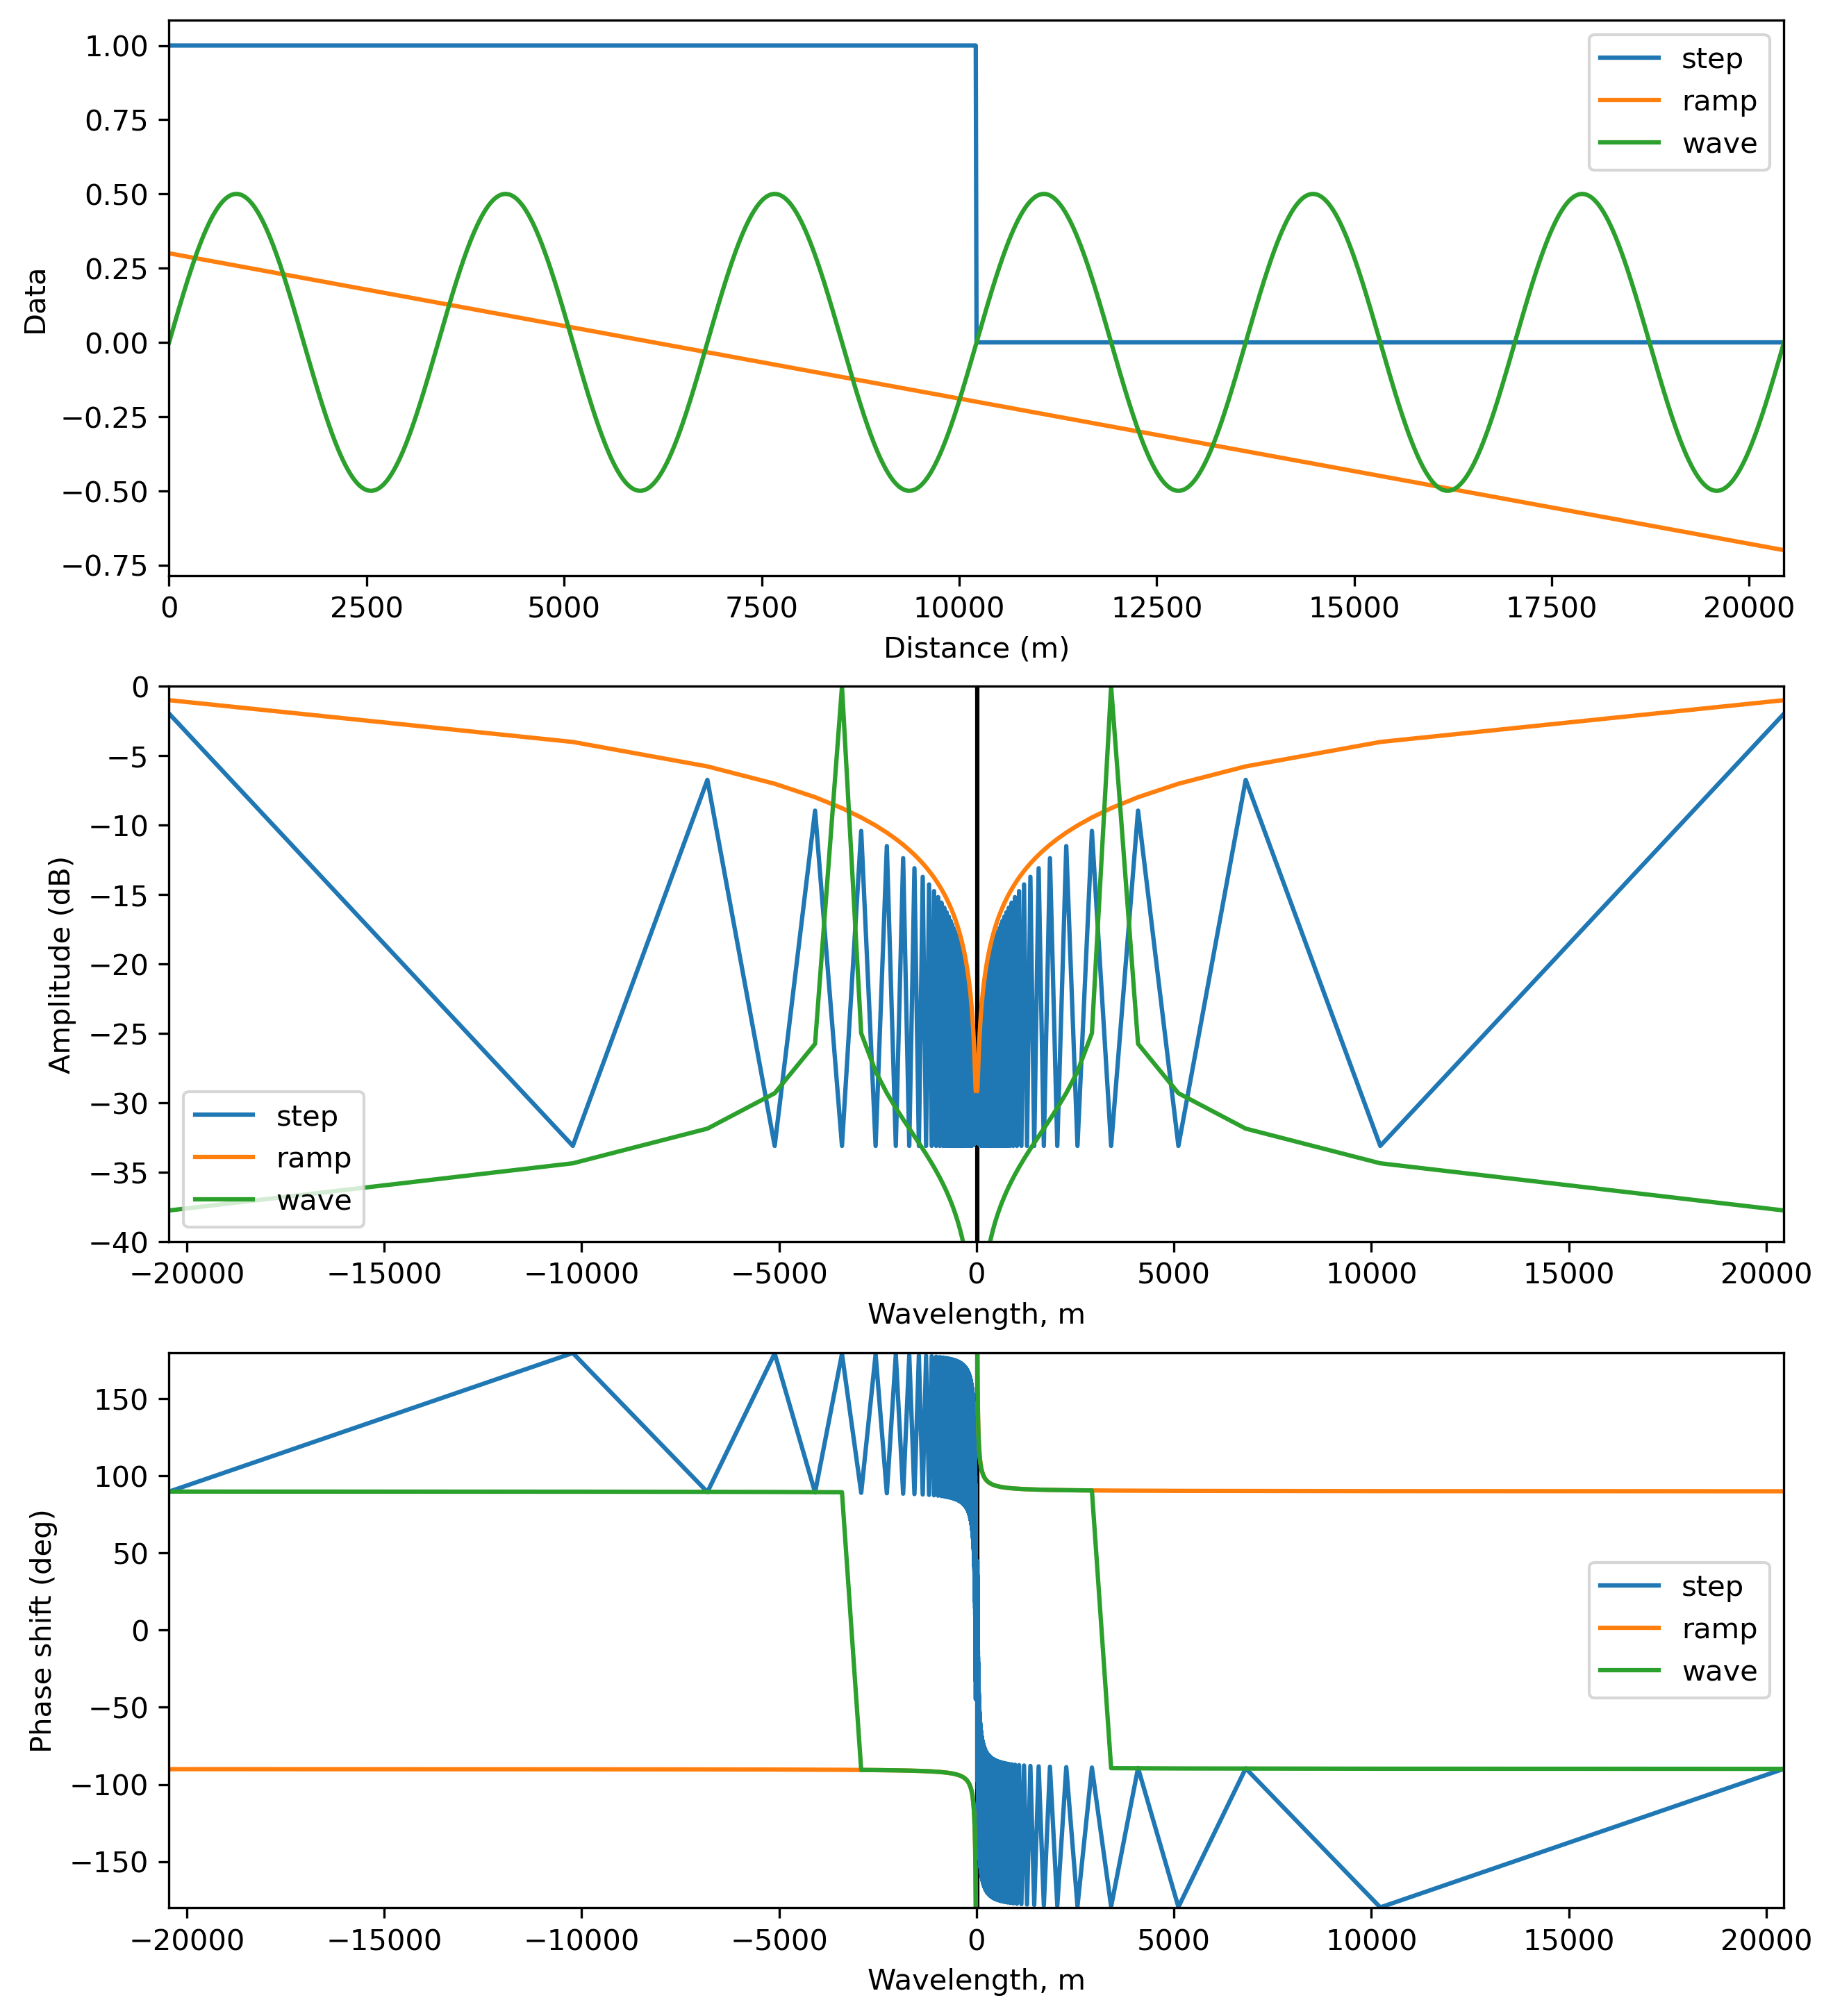

In [11]:
N = 2045  #USED A DIFFERENT N VALUE

x = np.arange(N, dtype='f8')*delta
print(x.min(), x.max())

freqs = np.fft.fftfreq(N, delta)
df = freqs[1]-freqs[0]
# frequency interval is the same as that calculated theoretically from fs/N
print(df, fs/N)
# and so is the Nyquist
print(freqs.min(), freqs.max(), fn)

fftshift = np.fft.fftshift

def dB(a,base=1.0):
    return 10.0*np.log10(a/base)

def response_plot(signals, x, axs, freq, labels=None, wavelength=False, dB_amp=True):
    """ Signals is a tuple or list (or iterable) of signals.
    """
    if labels is None:
        labels = range(len(signals))
    ax_t, ax_f, ax_p = axs
    
    if wavelength:
        freqs = 1.0/freq
        freq_label = 'Wavelength, m' 
        fmin, fmax = np.nanmin(freqs), -np.nanmin(freqs)
        for ax in [ax_f, ax_p]: ax.axvline(Ln, color='k')
    else:
        freqs = freq
        freq_label = 'Spatial Frequency, m^-1' 
        fmin, fmax = np.nanmin(freqs), np.nanmax(freqs)
    print(fmin, fmax)
    
    for signal, label in zip(signals, labels):
        fft_s = np.fft.fft(signal/signal.sum(), signal.shape[0])
        amplitude = np.abs(fftshift(fft_s))
        amplitude /= amplitude.max()
        phase = np.angle(fftshift(fft_s))
        
#         print(amplitude.max(), amplitude.min(), np.all(~np.isfinite(amplitude)))
#         print(phase.max(), phase.min())

        ax_t.plot(x, signal, label=label)
        ax_t.set_ylabel('Data')
        ax_t.set_xlabel('Distance (m)')
        ax_t.set_xlim(x.min(), x.max())
        john = ax_t.legend()

        if dB_amp:
            ax_f.plot(fftshift(freqs), dB(amplitude), label=label)
            ax_f.set_ylim(-40,0)
            ax_f.set_ylabel('Amplitude (dB)')
        else:
            ax_f.plot(fftshift(freqs), amplitude, label=label)
            ax_f.set_ylim(0,1)
            ax_f.set_ylabel('Amplitude (linear)')
        ax_f.set_xlim(fmin, fmax)
        ax_f.set_xlabel(freq_label)
        john = ax_f.legend()

        ax_p.plot(fftshift(freqs), np.degrees(phase), label=label)
        ax_p.set_ylim(-180,180)
        ax_p.set_xlim(fmin, fmax)
        ax_p.set_ylabel('Phase shift (deg)')
        ax_p.set_xlabel(freq_label)
        john = ax_p.legend()
        

fig, axes = plt.subplots(3,1, figsize=(10,12), dpi=300)

step = np.zeros_like(x)
step[:int(N/2)] = 1.0

ramp = -x/x.max() + 0.3

wave = np.sin(x*12*np.pi/x.max())/2

signals = [step, ramp, wave]
labels = ['step', 'ramp', 'wave']

response_plot(signals[:], x, axes, freqs, labels=labels[:], wavelength=True)

**2.** 

**a.** Implment the Barnes distance-dependent weighting function for $\kappa^* = 0.1$ and $0.5$. Center the weight function in the middle of the time series.

**b.** Simulate an artificial cutoff radius by setting any weights with value less than 0.1 to zero. This will give you four weight functions, two for each $\kappa^*$.

**c.** Use the `response_plot` function provided above to plot the four weight functions and their frequency domain response. Plot in wavelength mode, and zoom in to wavelengths between 0 and 200 (you don't need to show the negative wavelengths).

-20450.0 20450.0


<ipython-input-11-5faeb2e3e10a>:25: RuntimeWarning: divide by zero encountered in true_divide
  freqs = 1.0/freq


(0.0, 200.0)

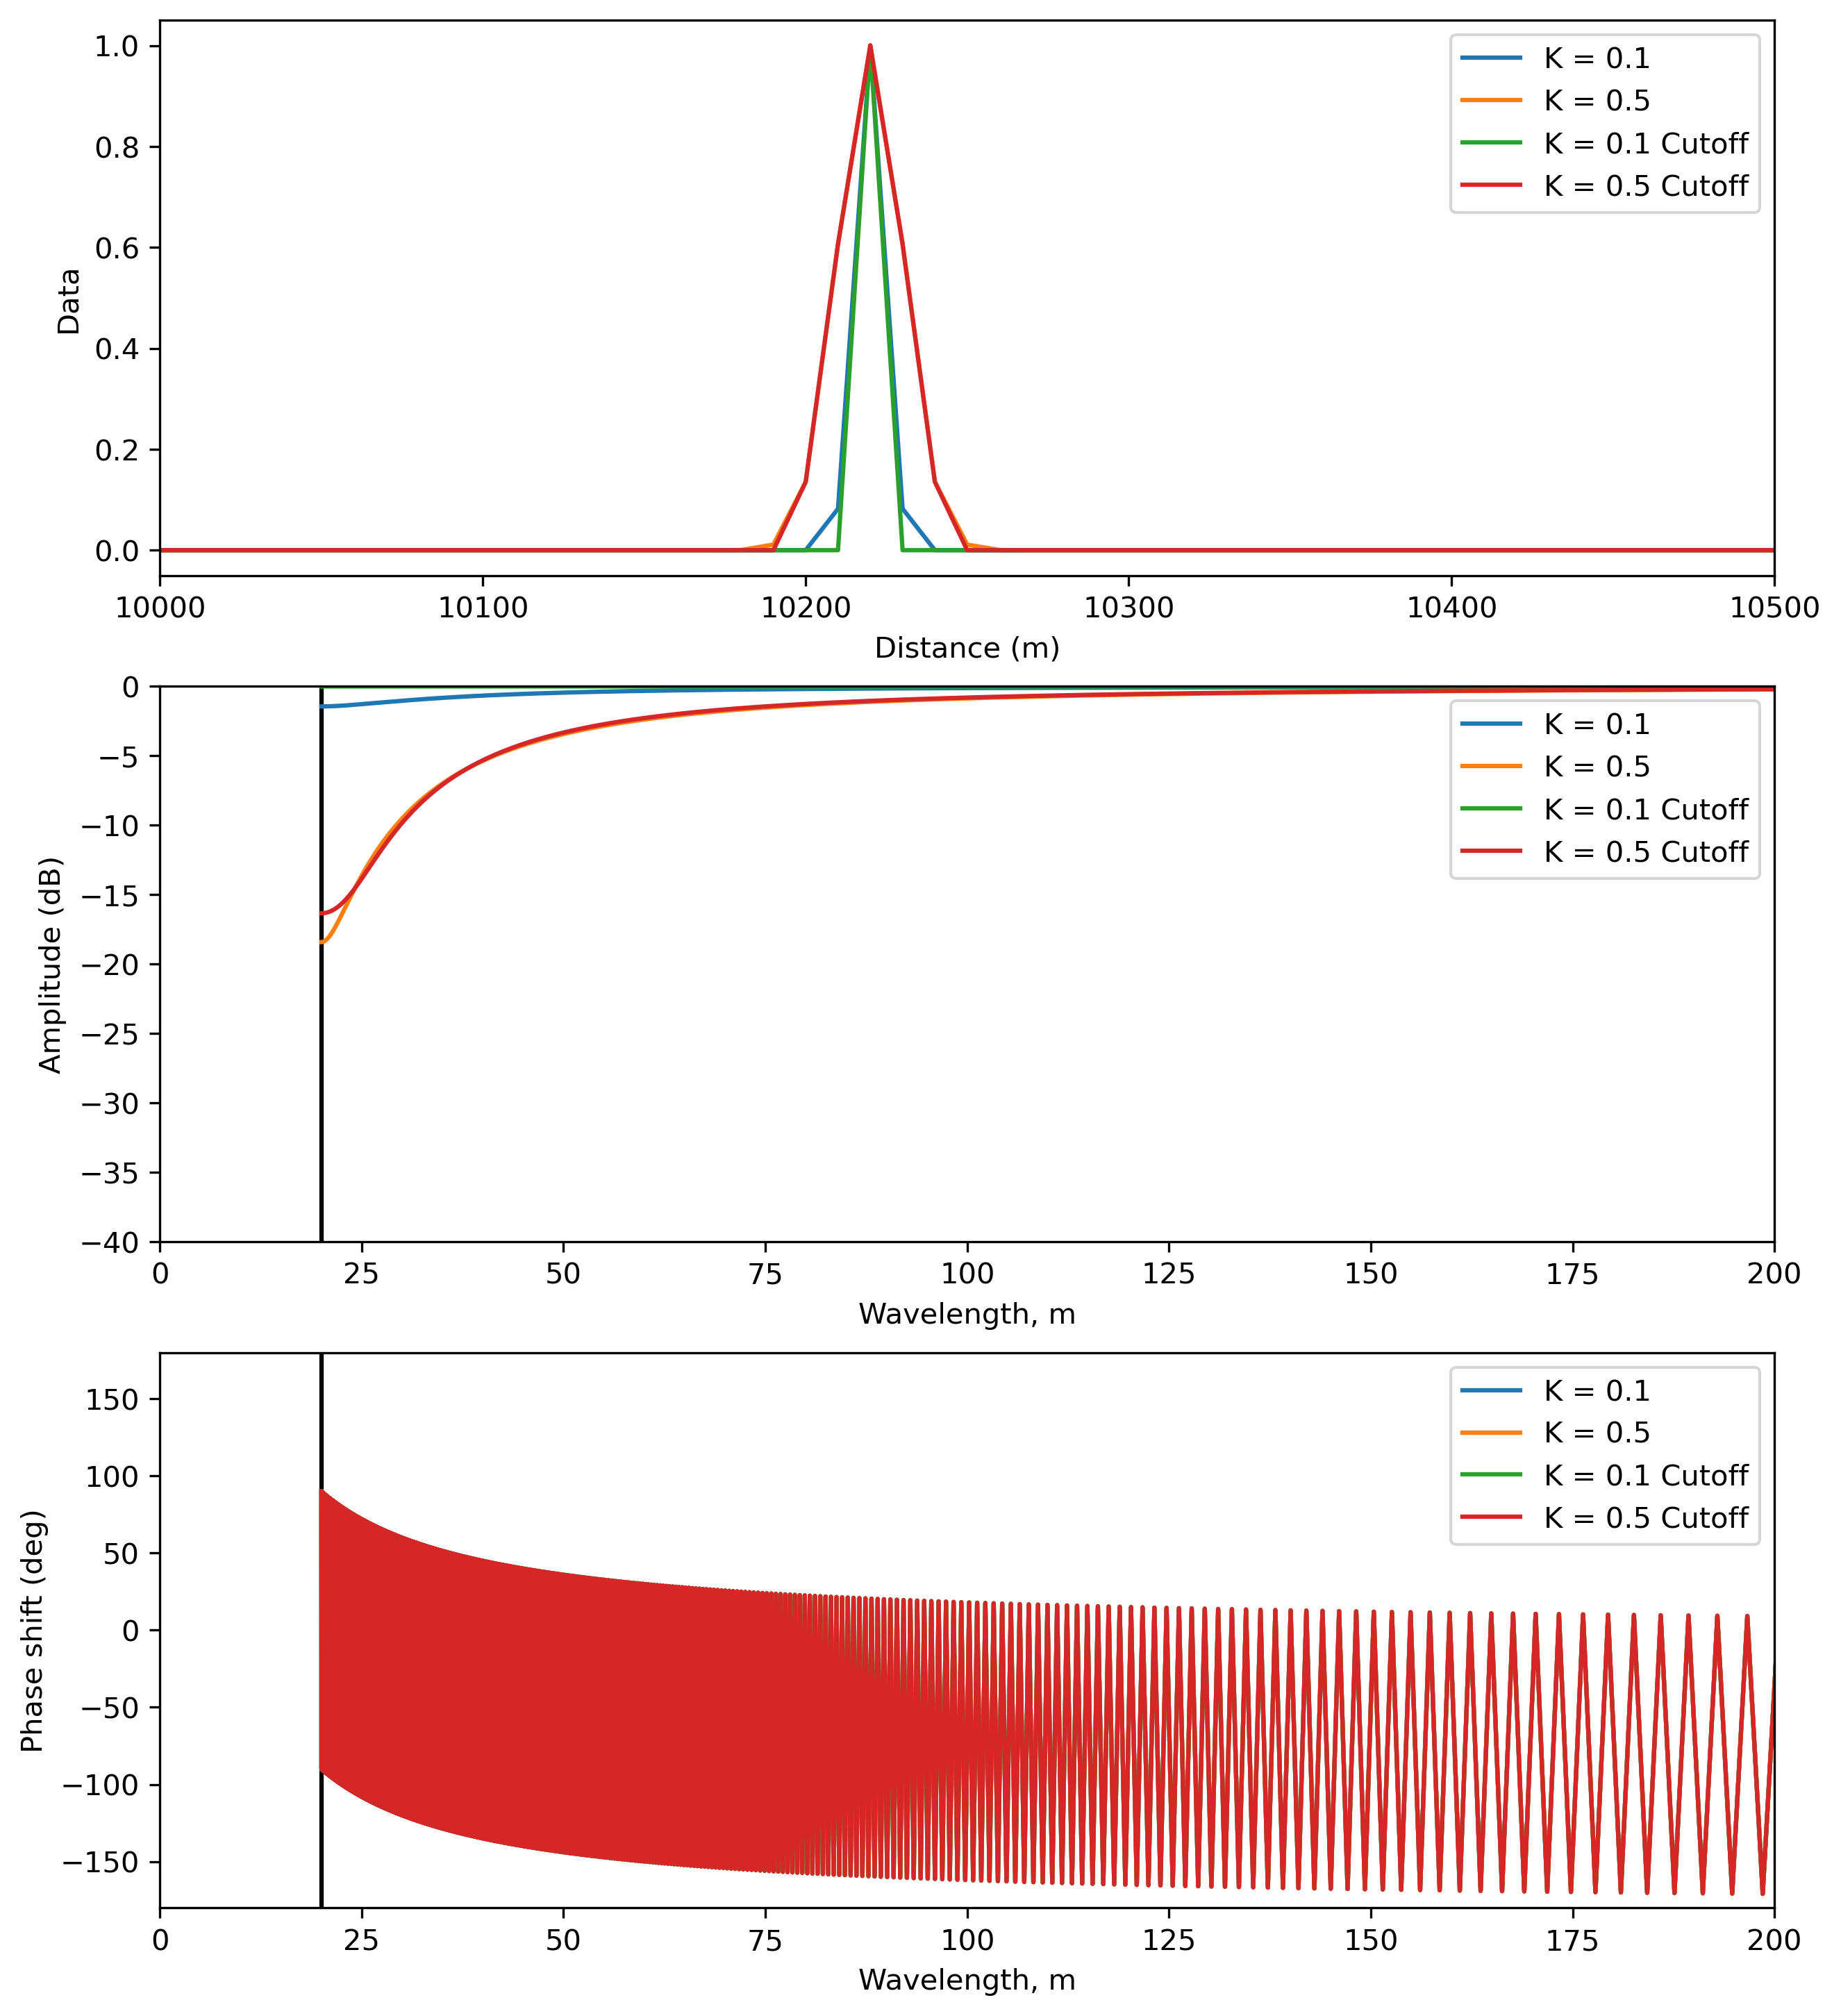

In [12]:
#Part A
def barnes(r, k):
    """ r has units of distance, and k is the dimensional weight parameter kappa
        kappa with units of distance squared.
        
        Returns the weights as a funcion of r.
    """
    pass 
    w = np.exp((-(r-(np.nanmax(x)/2))**2)/((4*(delta**2))*k))
    w_norm = np.exp(-k*((np.pi/k)**2))
    
    cutoff_w = (w > 0.1)*w
    return w, w_norm, cutoff_w

r_1 = np.sqrt(0.1)
r_2 = np.sqrt(0.5)

w_1, w_norm_1, w_cutoff1 = barnes(x , 0.1)
w_2, w_norm_2, w_cutoff2 = barnes(x , 0.5)

from scipy.signal.windows import gaussian

fig, axes = plt.subplots(3, 1, figsize=(10,12), dpi=300)

signals = [w_1, w_2, w_cutoff1, w_cutoff2]
labels = ['K = 0.1', 'K = 0.5', 'K = 0.1 Cutoff', 'K = 0.5 Cutoff']

response_plot(signals[:], x, axes, freqs, labels=labels[:], wavelength=True)
axes[0].set_xlim(10000, 10500)
axes[1].set_xlim(0,200)
axes[2].set_xlim(0,200)

**3.** Instead of weighting with the distance dependent weighting function you wrote, let's use the built-in Gaussian function: `from scipy.signal.windows import gaussian`. It is formulated in terms of the standard deviation. In lecture we derived the relationship $\sigma = \sqrt{2\kappa^*}$. 

Reproduce your plot above using the built-in Gaussian window (weight) function.

<span class="ecb">Missing reproduction of cut-off functions. -3</span>

-20450.0 20450.0


<ipython-input-11-5faeb2e3e10a>:25: RuntimeWarning: divide by zero encountered in true_divide
  freqs = 1.0/freq


(0.0, 200.0)

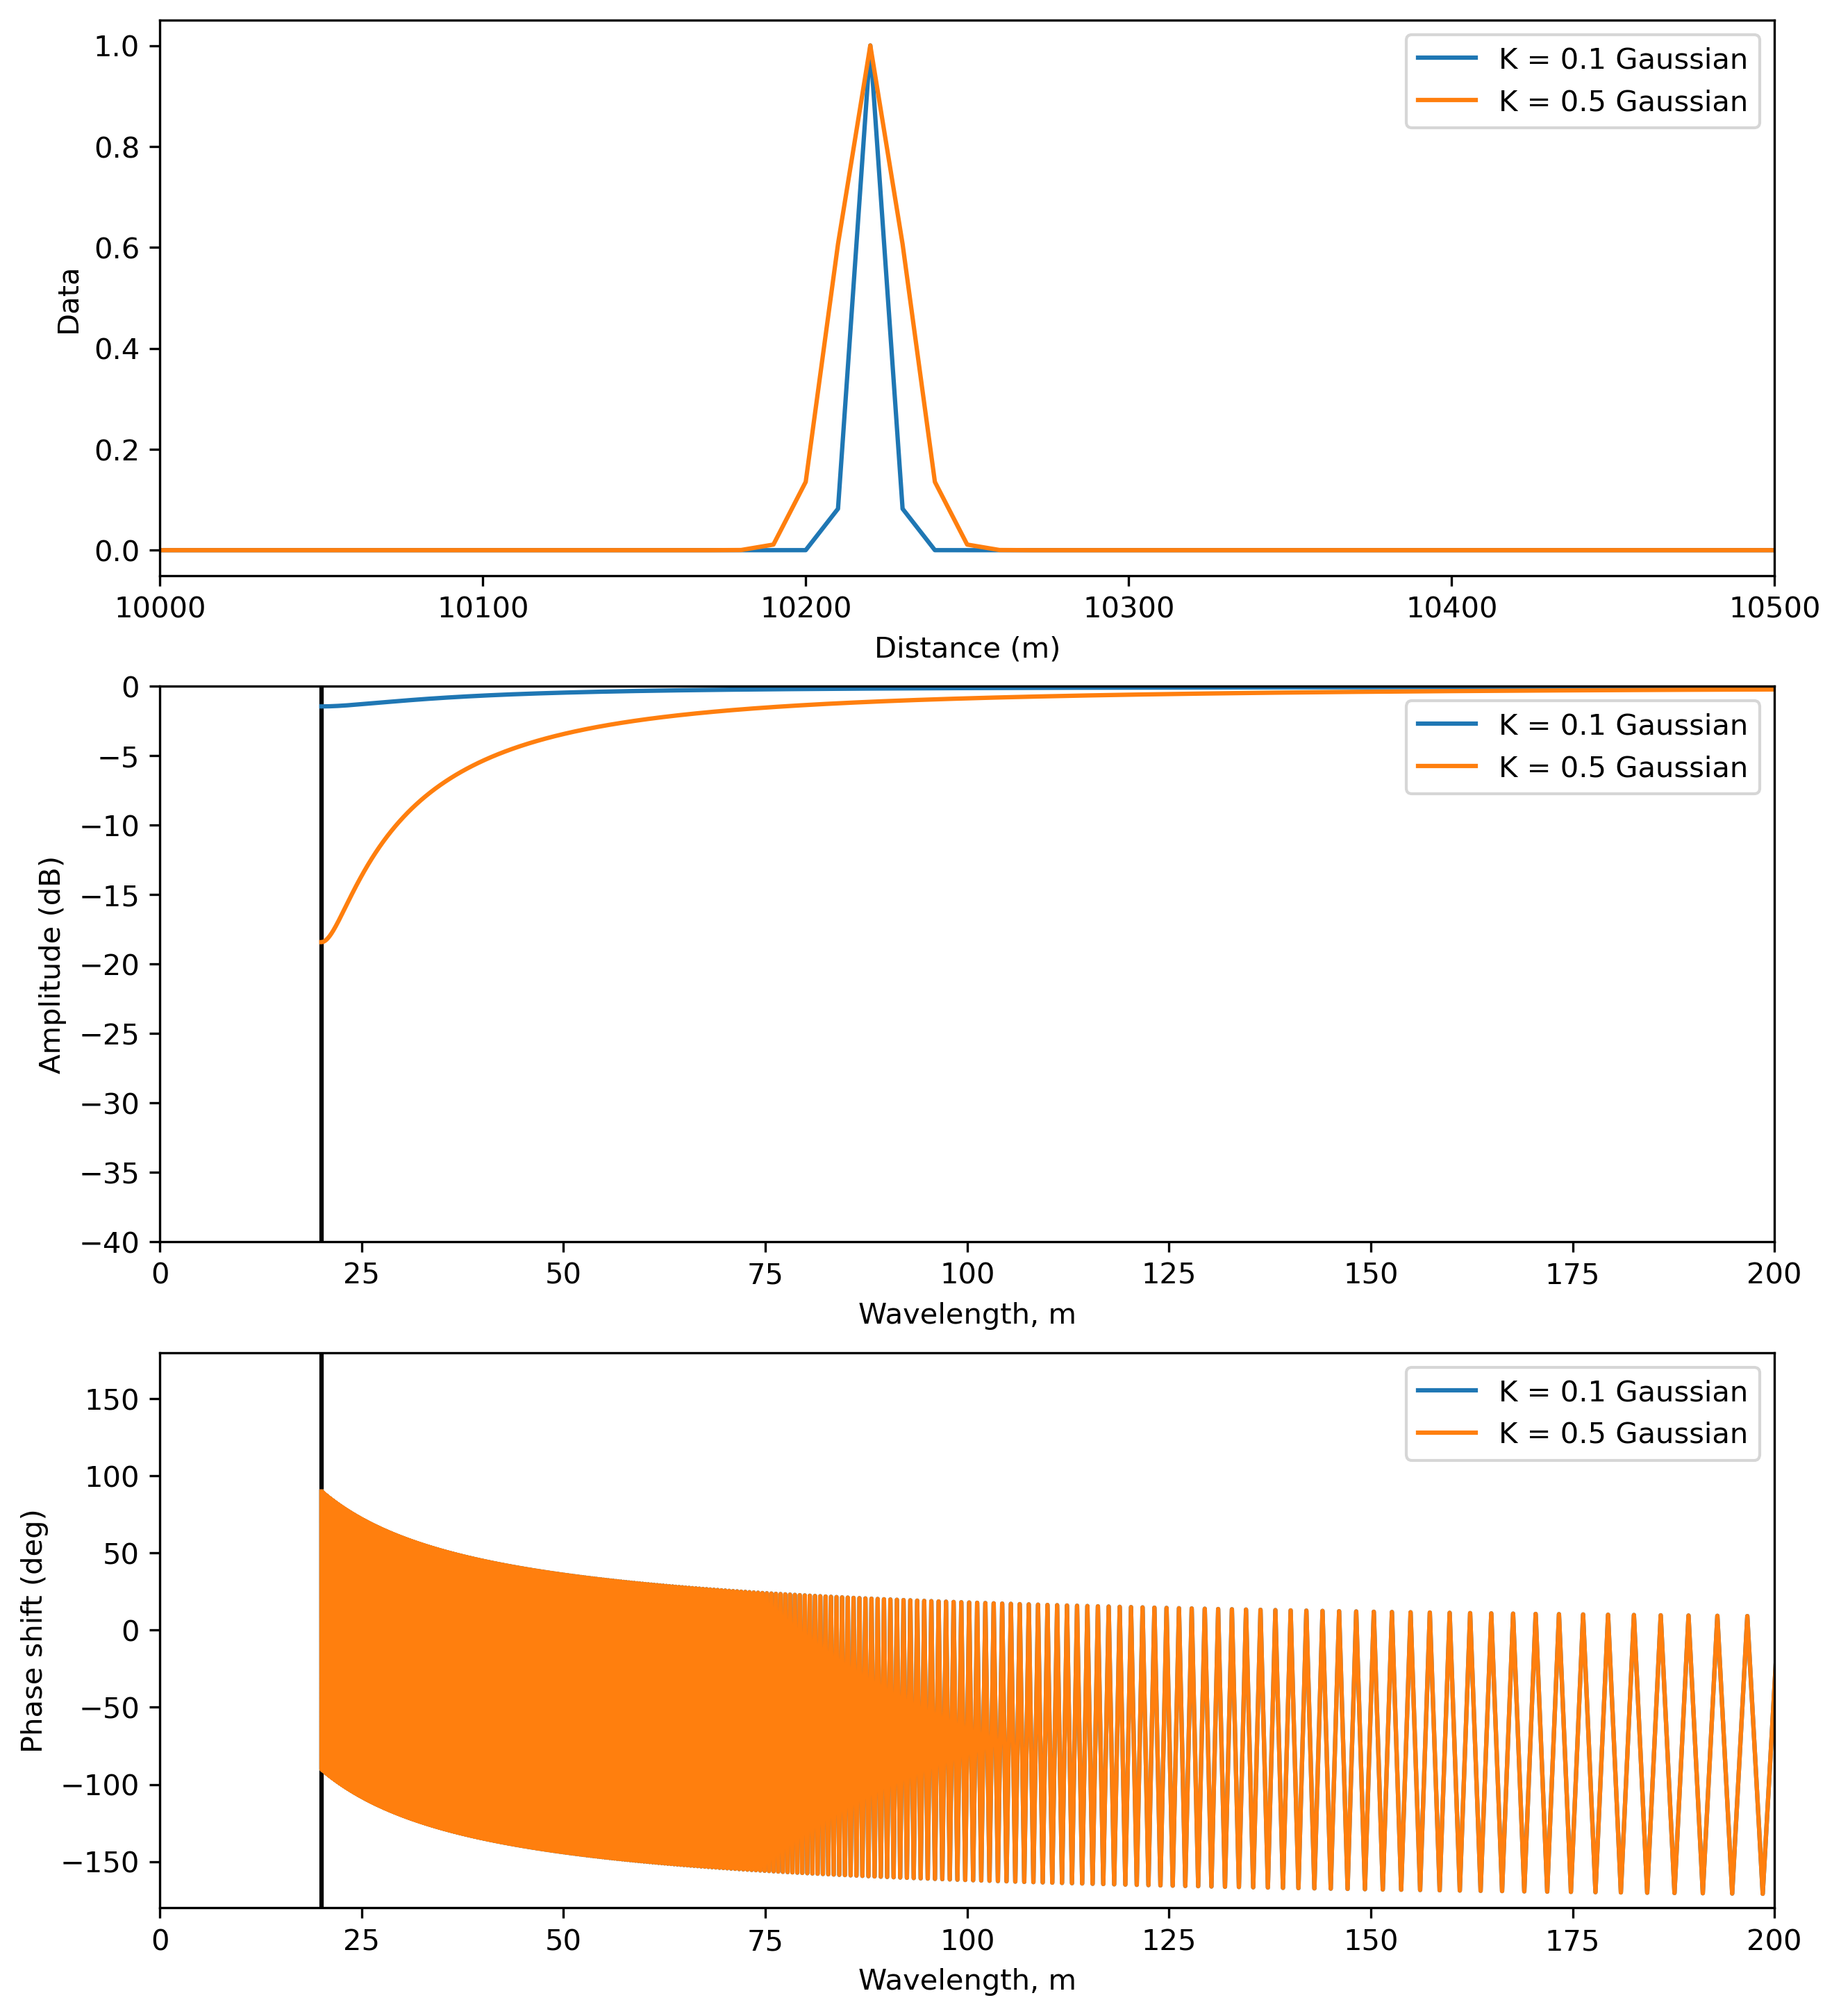

In [13]:
from scipy.signal.windows import gaussian

def sigma(k):
    sigma = np.sqrt(2*k)
    return sigma

sigma1 = sigma(0.1)
sigma2 = sigma(0.5)

gauss1 = gaussian(N, sigma1)
gauss2 = gaussian(N, sigma2)

fig, axes = plt.subplots(3, 1, figsize=(10,12), dpi=300)

signals = [gauss1, gauss2]
labels = ['K = 0.1 Gaussian', 'K = 0.5 Gaussian']

response_plot(signals[:], x, axes, freqs, labels=labels[:], wavelength=True)
axes[0].set_xlim(10000, 10500)
axes[1].set_xlim(0,200)
axes[2].set_xlim(0,200)

**4.** Implement and plot the frequency response for 3- and 5-point rectangular weight (boxcar) functions.

-20450.0 20450.0


<ipython-input-11-5faeb2e3e10a>:25: RuntimeWarning: divide by zero encountered in true_divide
  freqs = 1.0/freq


(0.0, 200.0)

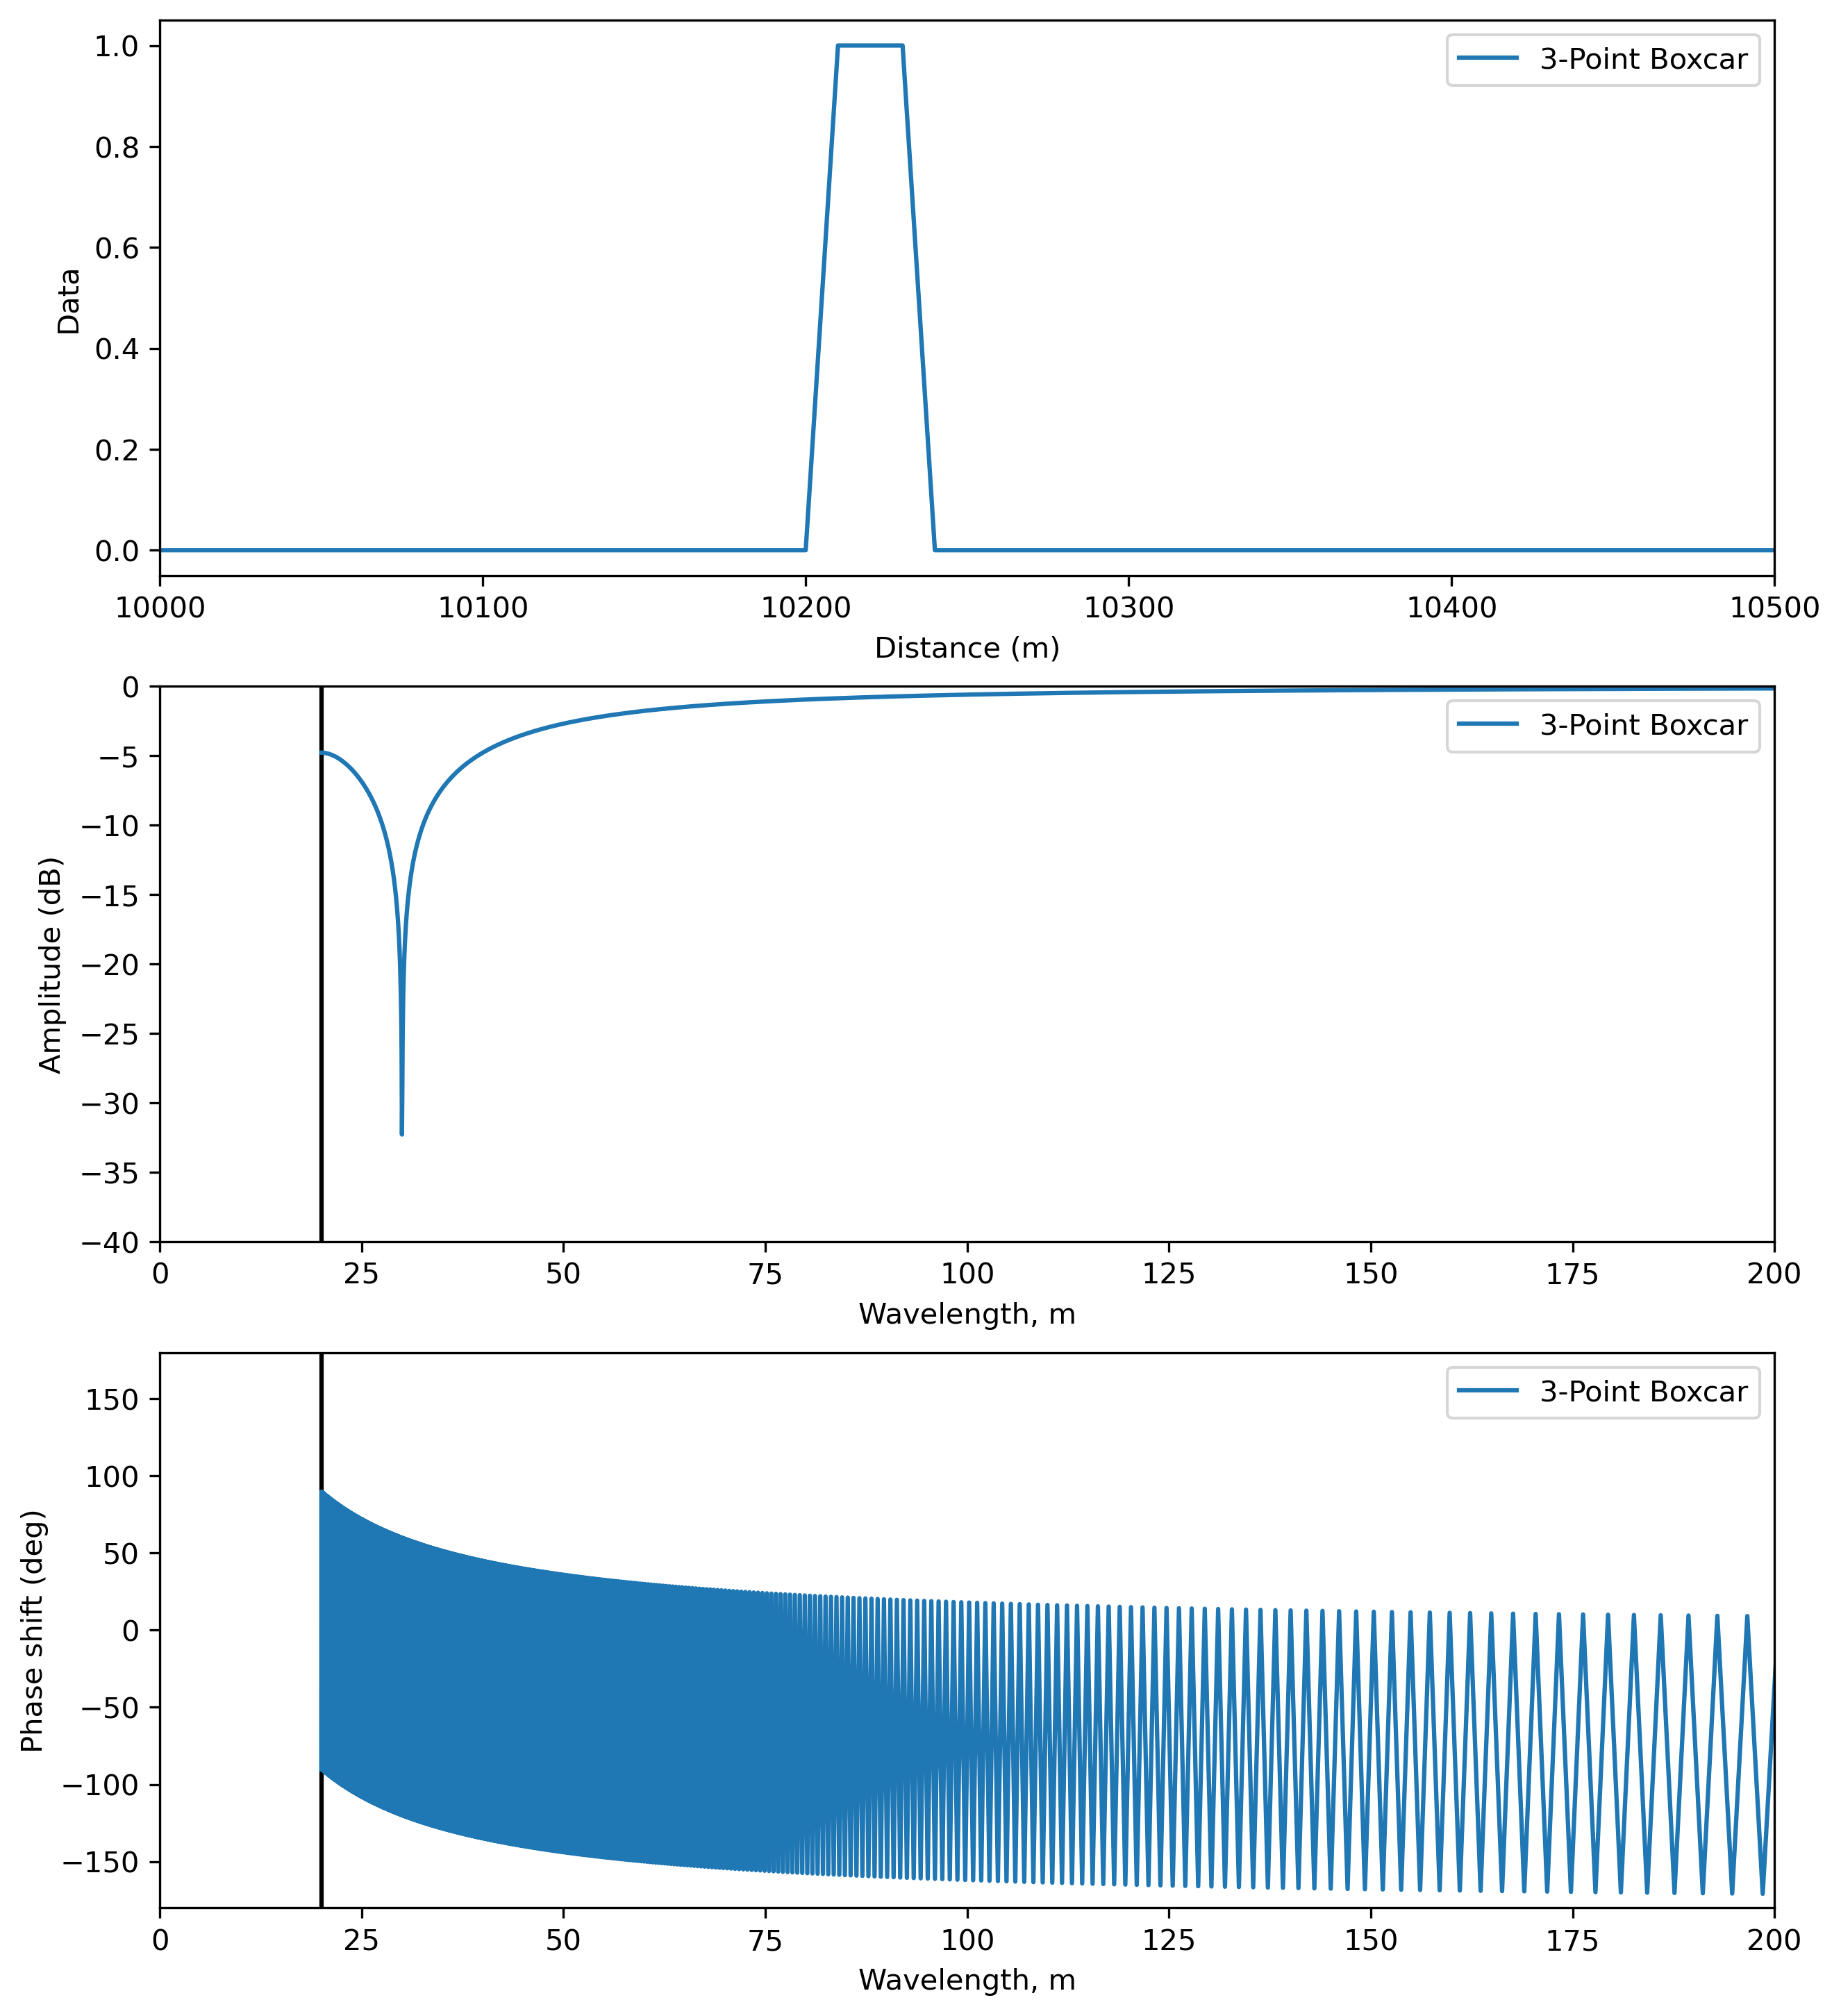

In [14]:
from scipy.signal.windows import boxcar
#3-point Boxcar 

boxcar = boxcar(N)

center = int((len(boxcar))/2)
boxcar_3 = np.array(boxcar)
boxcar_3[0:center-1] = 0
boxcar_3[center+2:] = 0

fig, axes = plt.subplots(3, 1, figsize=(10,12), dpi=300)

signals = [boxcar_3]
labels = ['3-Point Boxcar']

response_plot(signals[:], x, axes, freqs, labels=labels[:], wavelength=True)
axes[0].set_xlim(10000, 10500)
axes[1].set_xlim(0,200)
axes[2].set_xlim(0,200)

-20450.0 20450.0


<ipython-input-11-5faeb2e3e10a>:25: RuntimeWarning: divide by zero encountered in true_divide
  freqs = 1.0/freq


(0.0, 200.0)

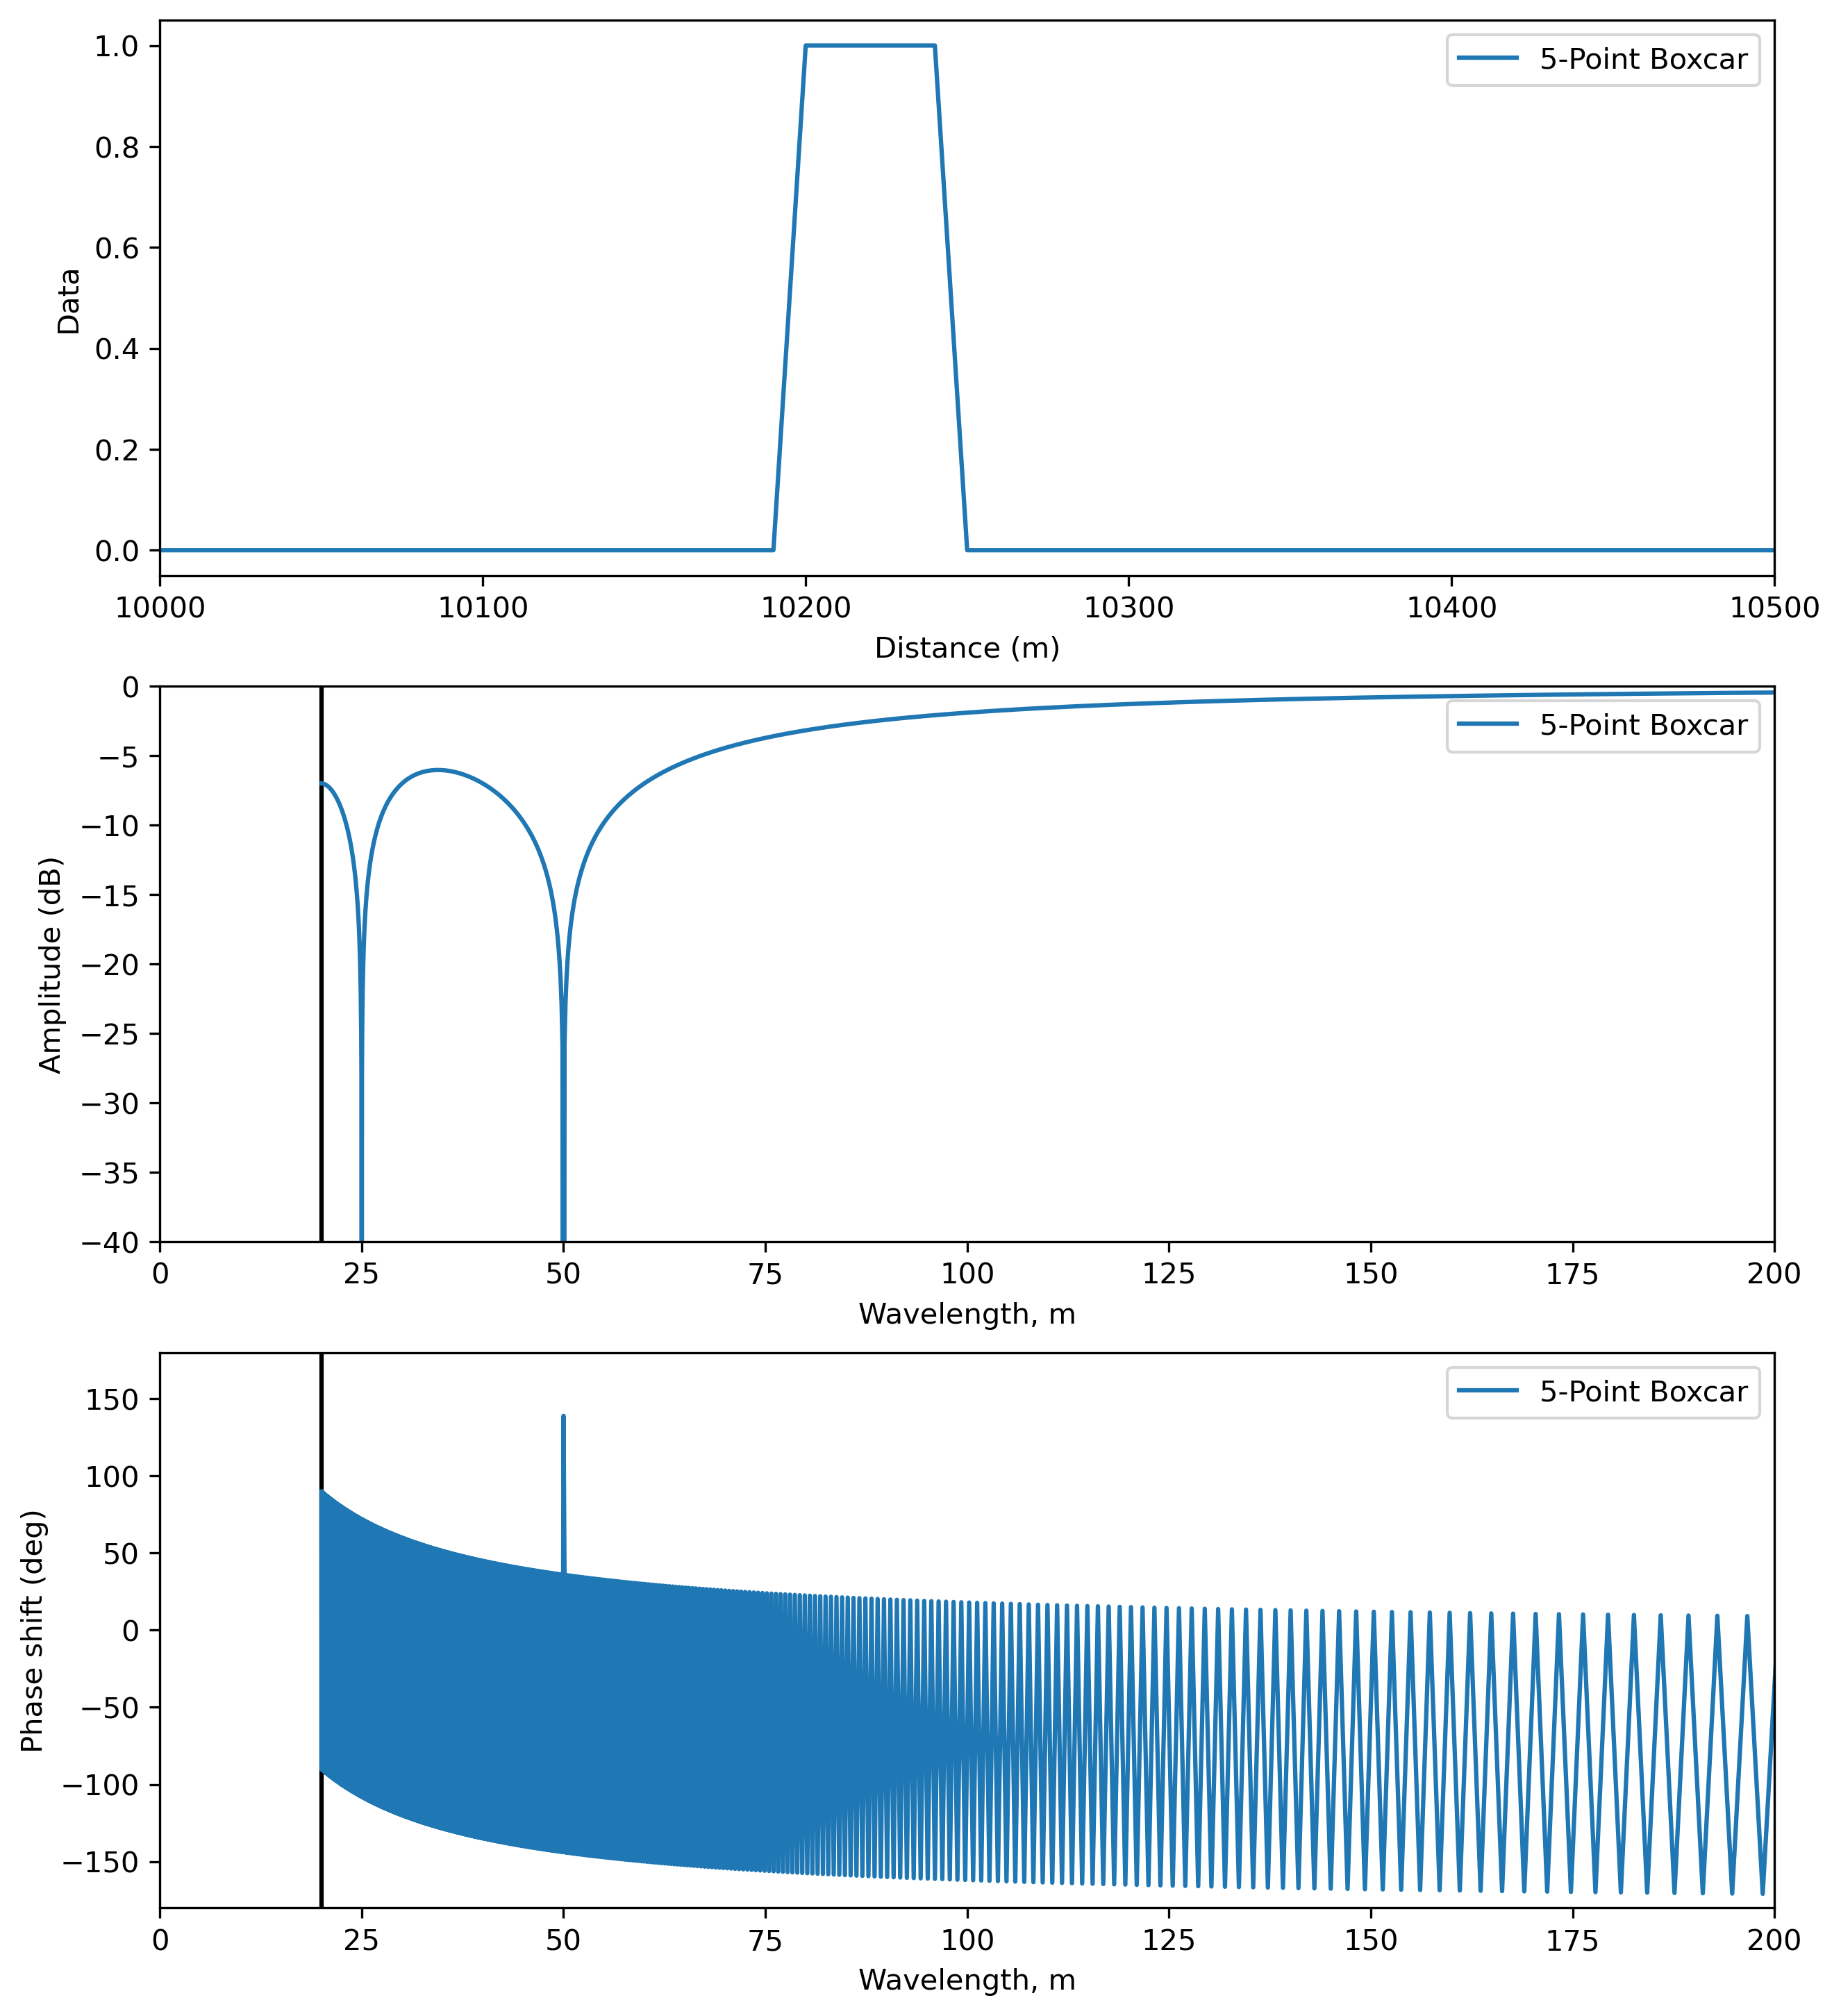

In [17]:
from scipy.signal.windows import boxcar
#5-Point Boxcar 

boxcar1 = boxcar(N)

center1 = int((len(boxcar1))/2)
boxcar_5 = np.array(boxcar1)
boxcar_5[0:center1-2] = 0
boxcar_5[center1+3:] = 0

fig, axes = plt.subplots(3, 1, figsize=(10,12), dpi=300)

signals = [boxcar_5]
labels = ['5-Point Boxcar']

response_plot(signals[:], x, axes, freqs, labels=labels[:], wavelength=True)
axes[0].set_xlim(10000, 10500)
axes[1].set_xlim(0,200)
axes[2].set_xlim(0,200)

**5.** Implement and plot a 5-point Parzen (Riesz) weight function. Also show the effect of an artifical cutoff by removing the weights below 0.1.

<span class="ecb">You've essentially created one boxcar window here, and then a very wide cutoff Parzen one that is much wider than five points. -6</span>

-20450.0 20450.0


<ipython-input-11-5faeb2e3e10a>:25: RuntimeWarning: divide by zero encountered in true_divide
  freqs = 1.0/freq


(0.0, 200.0)

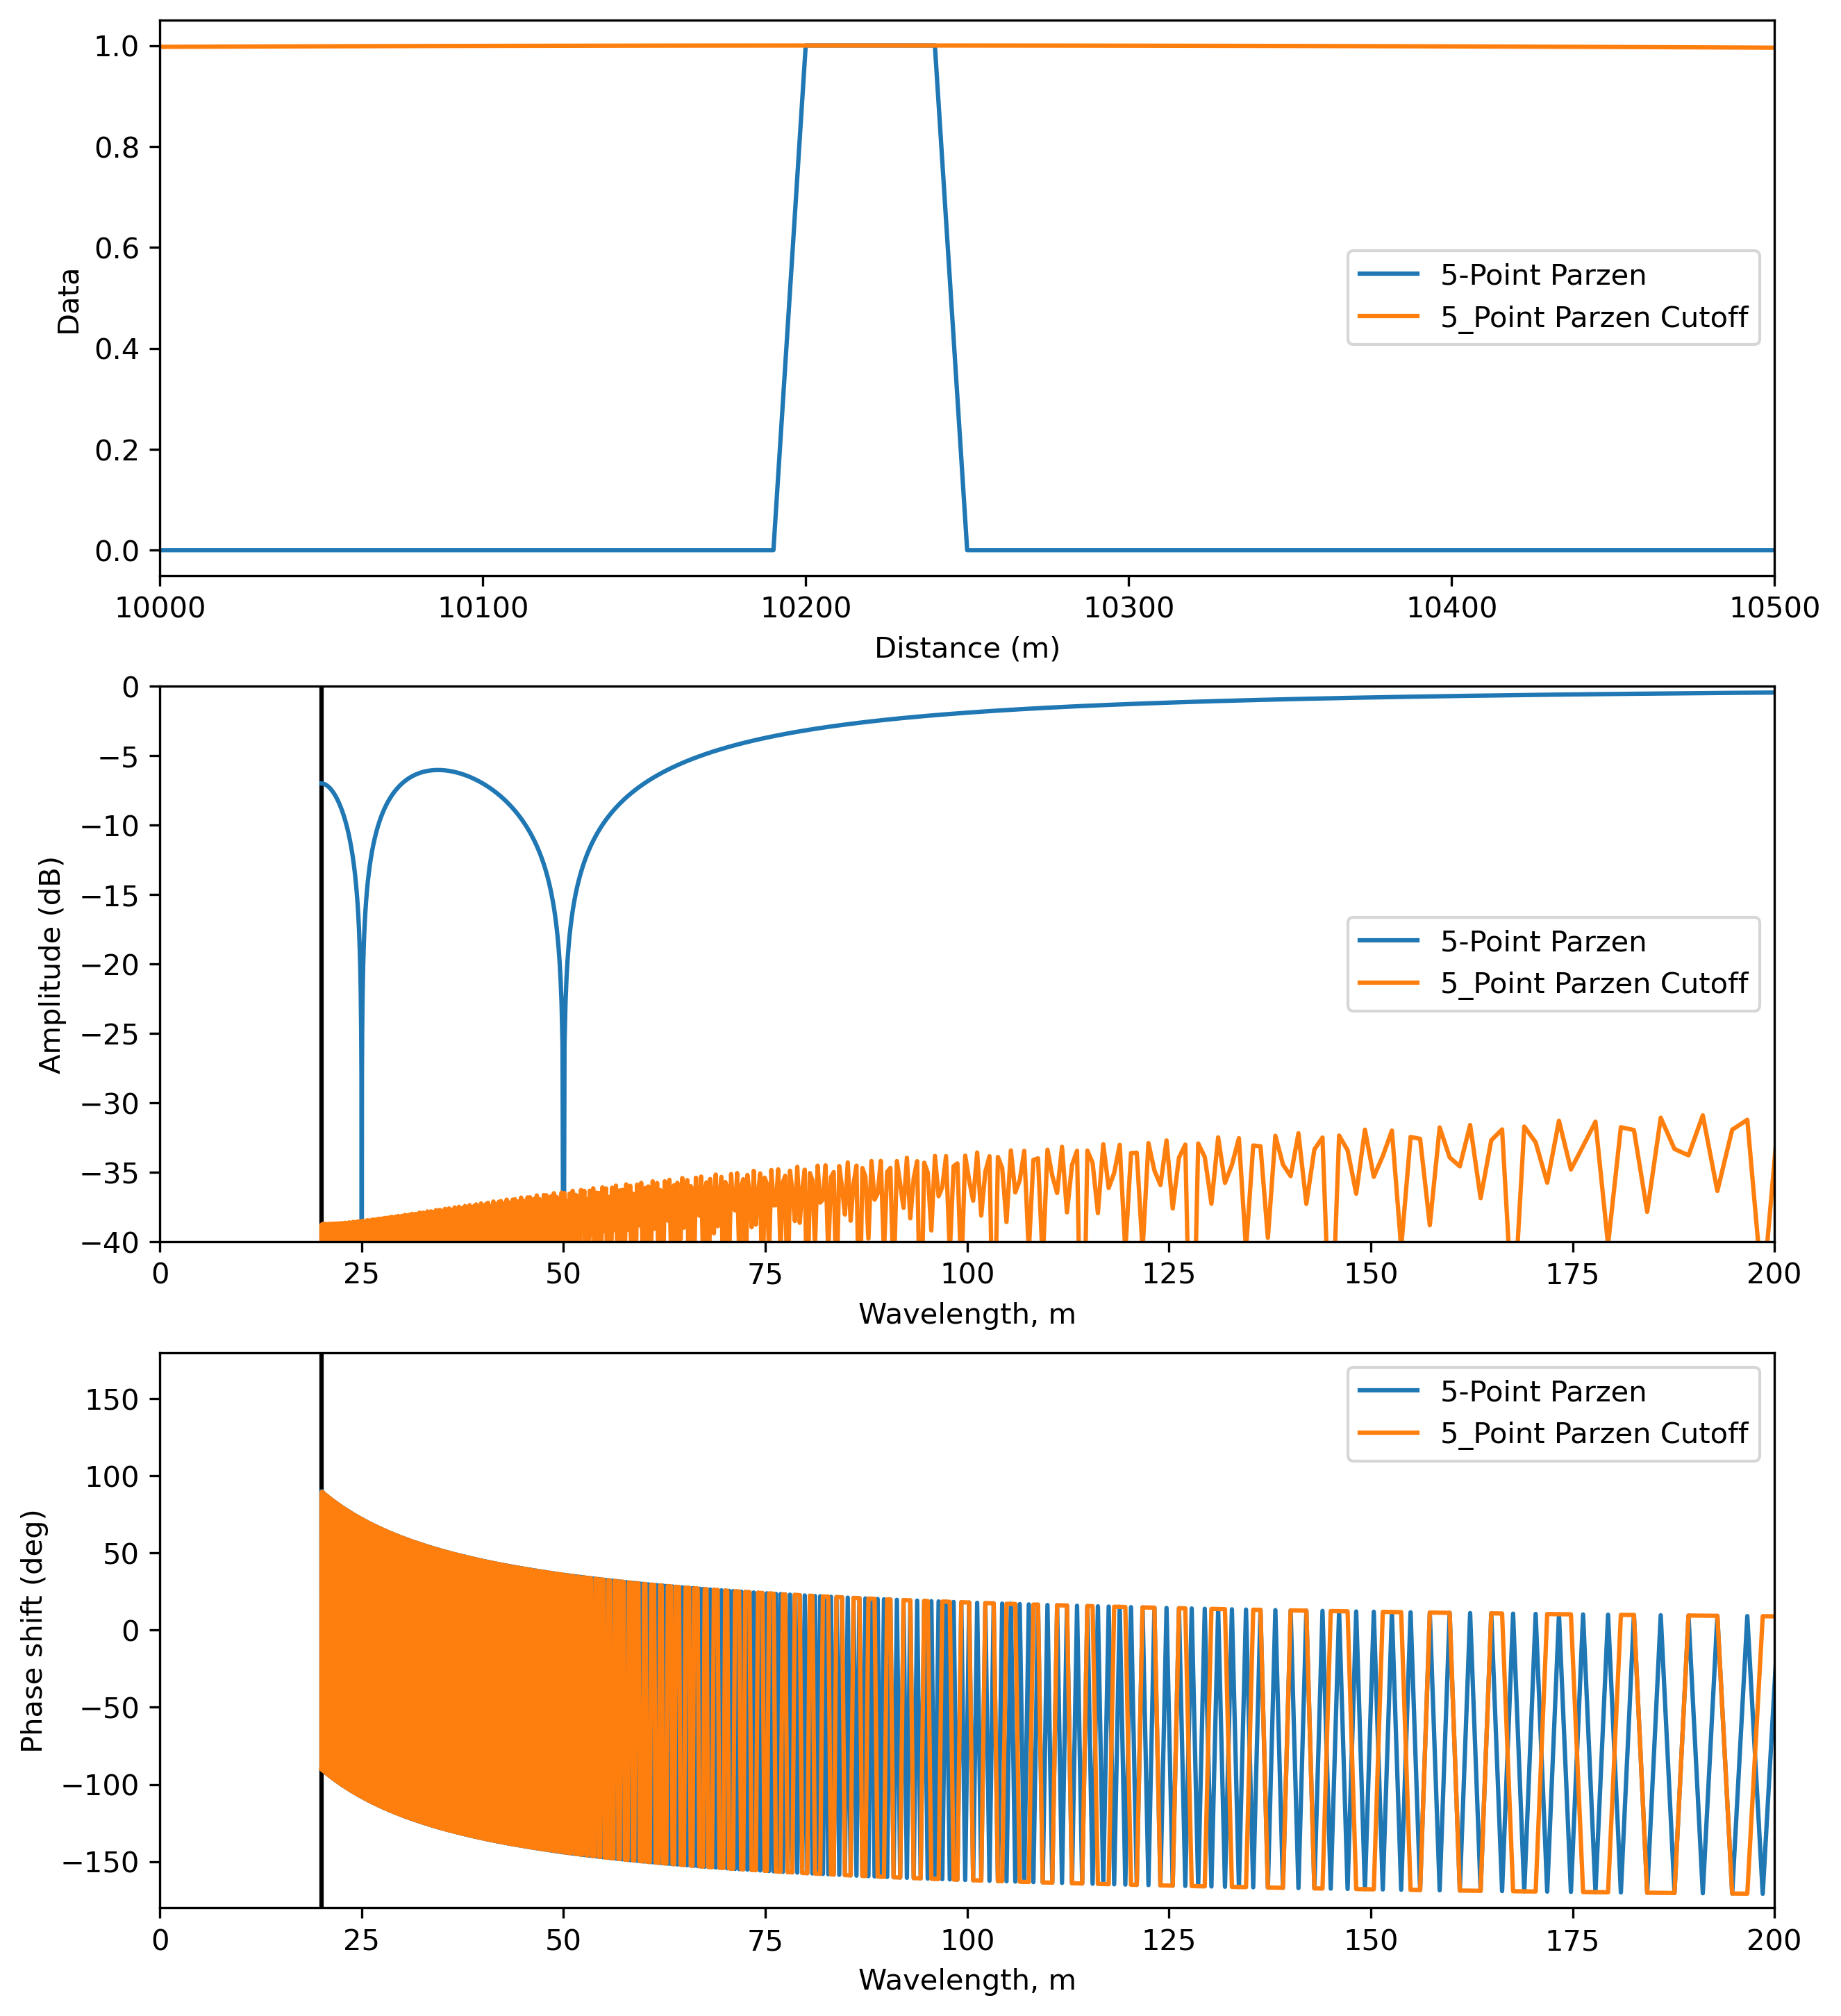

In [29]:
from scipy.signal.windows import parzen

parzen = parzen(N)

center2 = int((len(parzen))/2)
parzen_5 = np.array(parzen)
parzen_5[0:center2-2] = 0
parzen_5[center2+3:] = 0
parzen_cutoff = (parzen > 0.1)*parzen

fig, axes = plt.subplots(3, 1, figsize=(10,12), dpi=300)

signals = [parzen_5, parzen_cutoff]
labels = ['5-Point Parzen', '5_Point Parzen Cutoff']

response_plot(signals[:], x, axes, freqs, labels=labels[:], wavelength=True)
axes[0].set_xlim(10000, 10500)
axes[1].set_xlim(0,200)
axes[2].set_xlim(0,200)

**6.** Implement and plot a 5-point Dolph-Chebyshev weight function with a lowest sidelobe level of 60 dB. Also show the effect of an artifical cutoff by removing the weights below 0.1.

<span class="ecb">You've essentially created one boxcar window here, and then a very wide cutoff D-C one that is much wider than five points. -6</span>

-20450.0 20450.0


<ipython-input-11-5faeb2e3e10a>:25: RuntimeWarning: divide by zero encountered in true_divide
  freqs = 1.0/freq


(0.0, 200.0)

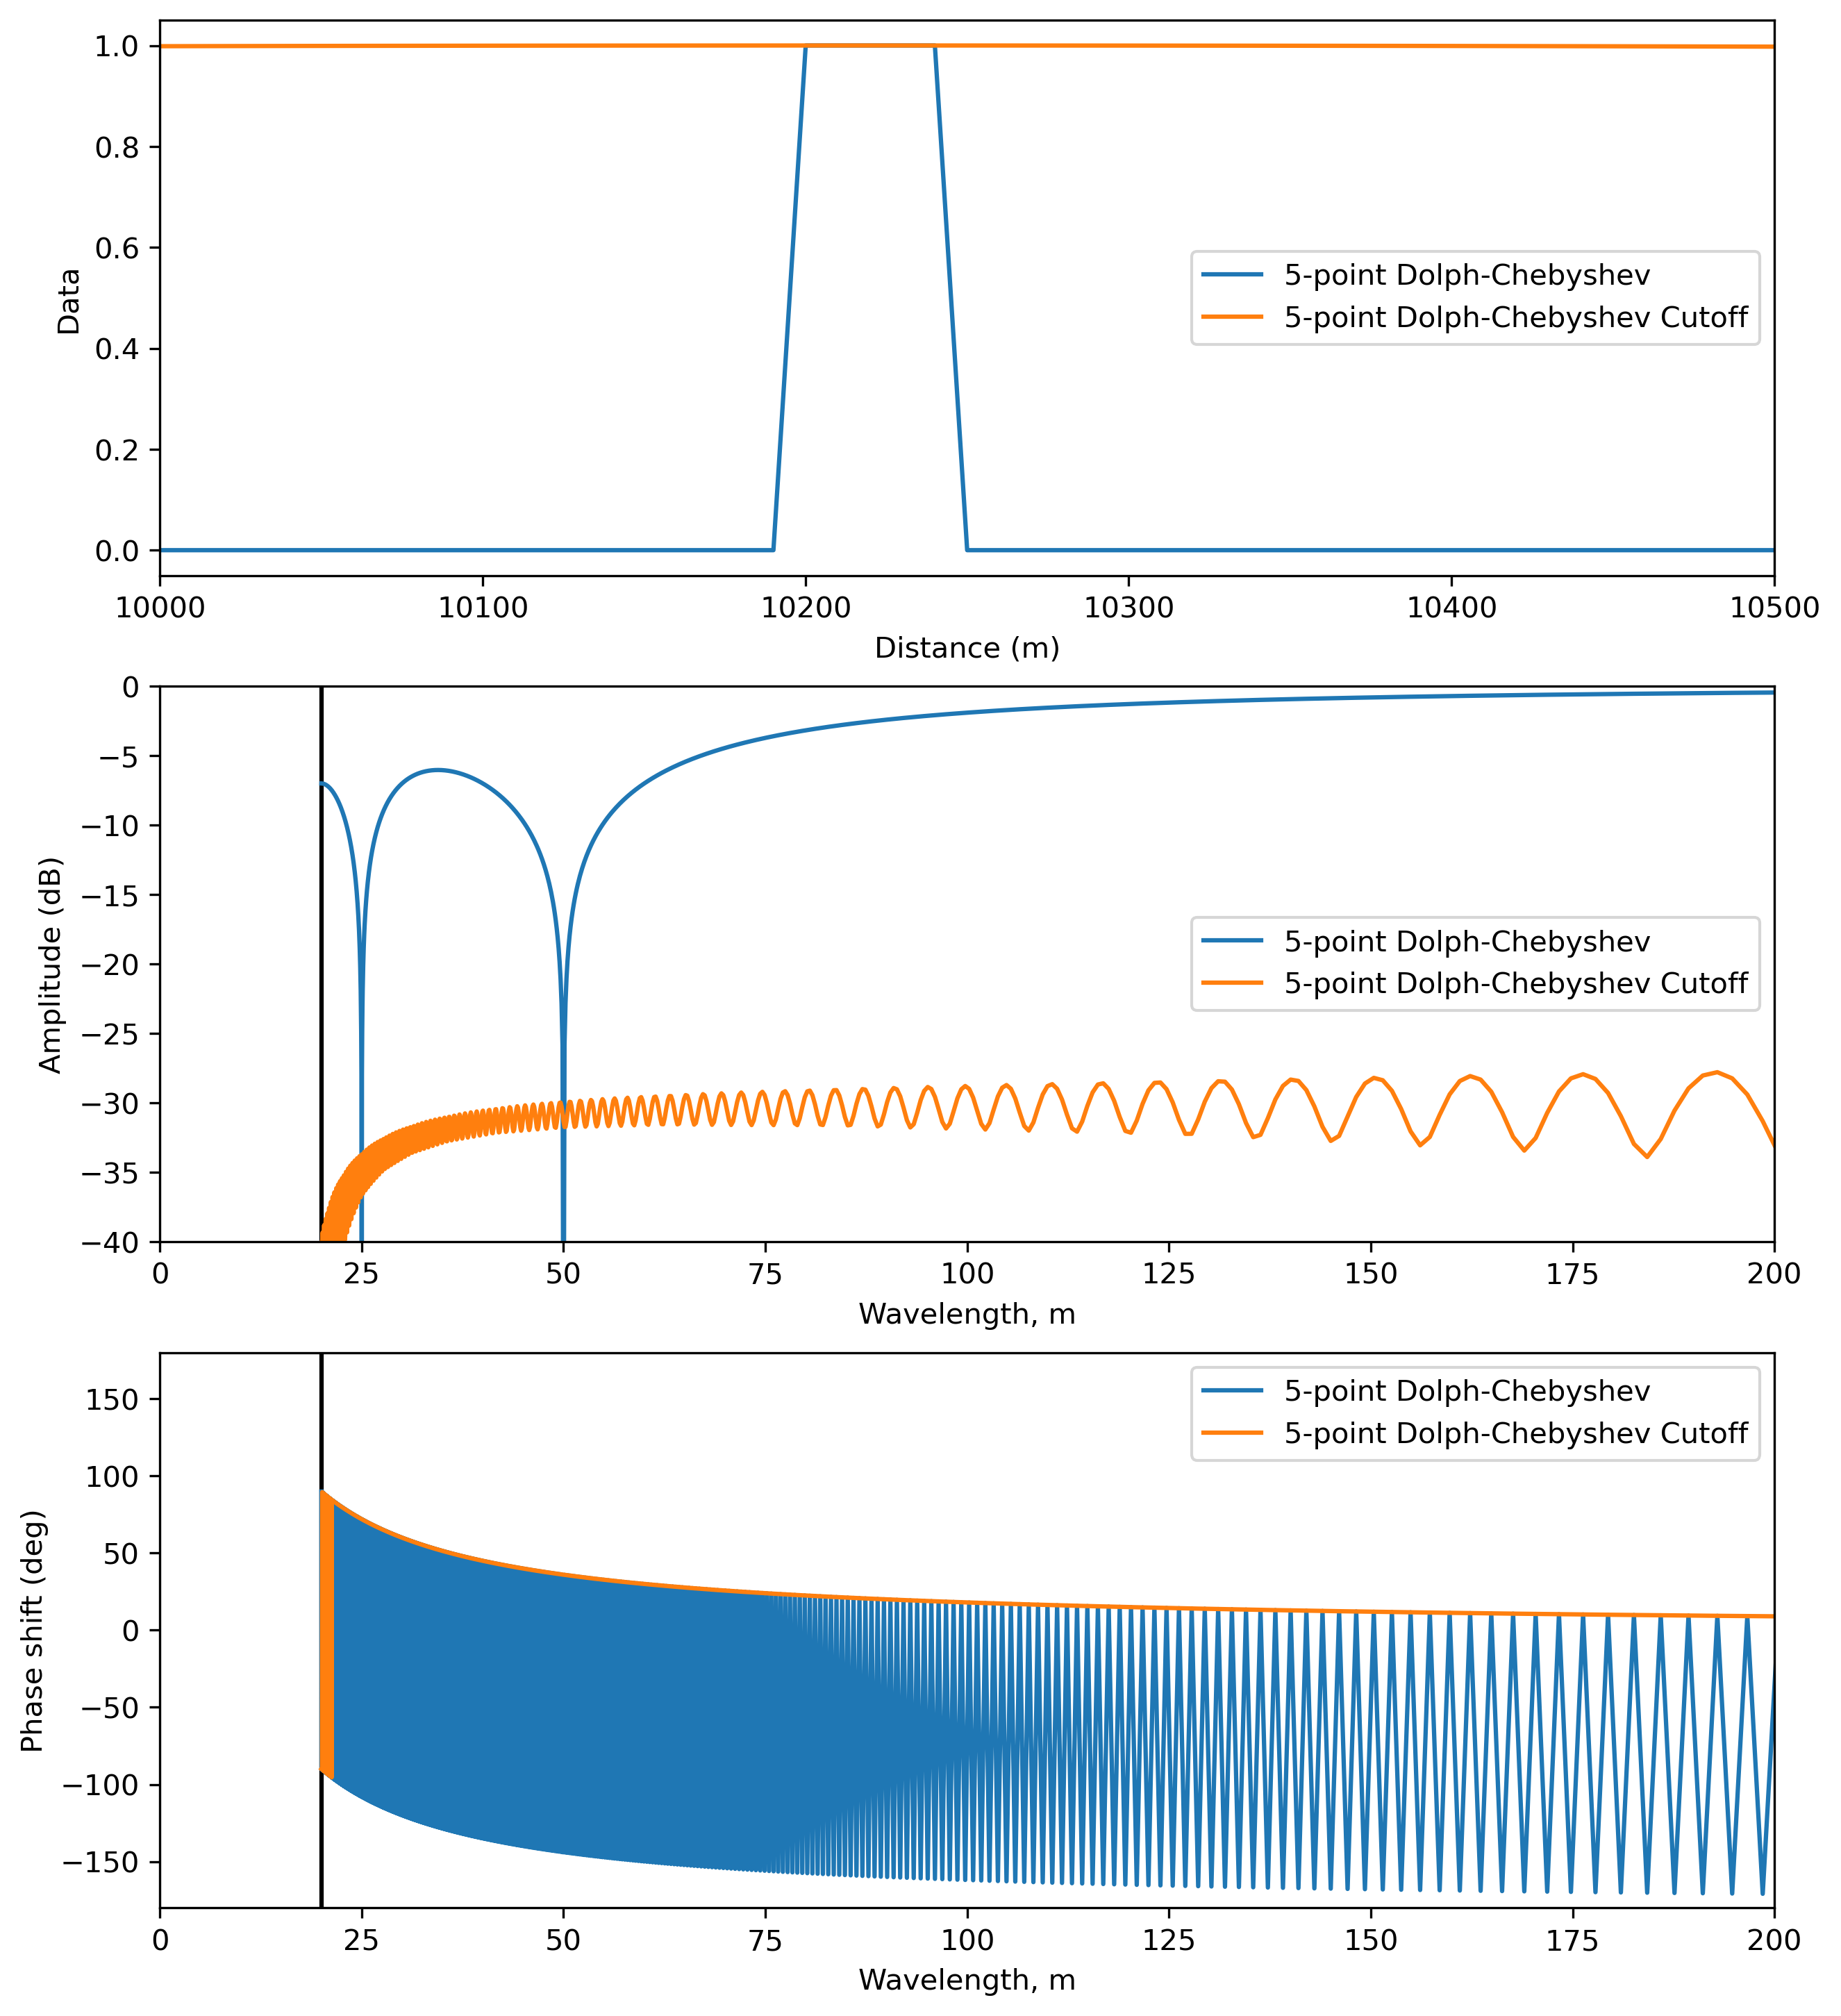

In [33]:
from scipy.signal.windows import chebwin

chebwin = chebwin(N, 60)

center3 = int((len(chebwin))/2)
chebwin_5 = np.array(chebwin)
chebwin_5[0:center3-2] = 0
chebwin_5[center3+3:] = 0
chebwin_cutoff = (chebwin > 0.1)*chebwin

fig, axes = plt.subplots(3, 1, figsize=(10,12), dpi=300)

signals = [chebwin_5, chebwin_cutoff]
labels = ['5-point Dolph-Chebyshev', '5-point Dolph-Chebyshev Cutoff']

response_plot(signals[:], x, axes, freqs, labels=labels[:], wavelength=True)
axes[0].set_xlim(10000, 10500)
axes[1].set_xlim(0,200)
axes[2].set_xlim(0,200)

**7.** Implement and plot a 7-point Blackman and a 7-point Blackman-Harris weight function. There is no need to show the effect of an artificial cutoff here.

<span class="ecb">You've essentially created two identical boxcar windows here, after starting with an N-point window that is essentially flat across the first five or seven points centered on the peak of the Blackman or BH windows. -8</span>

-20450.0 20450.0


<ipython-input-11-5faeb2e3e10a>:25: RuntimeWarning: divide by zero encountered in true_divide
  freqs = 1.0/freq


(0.0, 200.0)

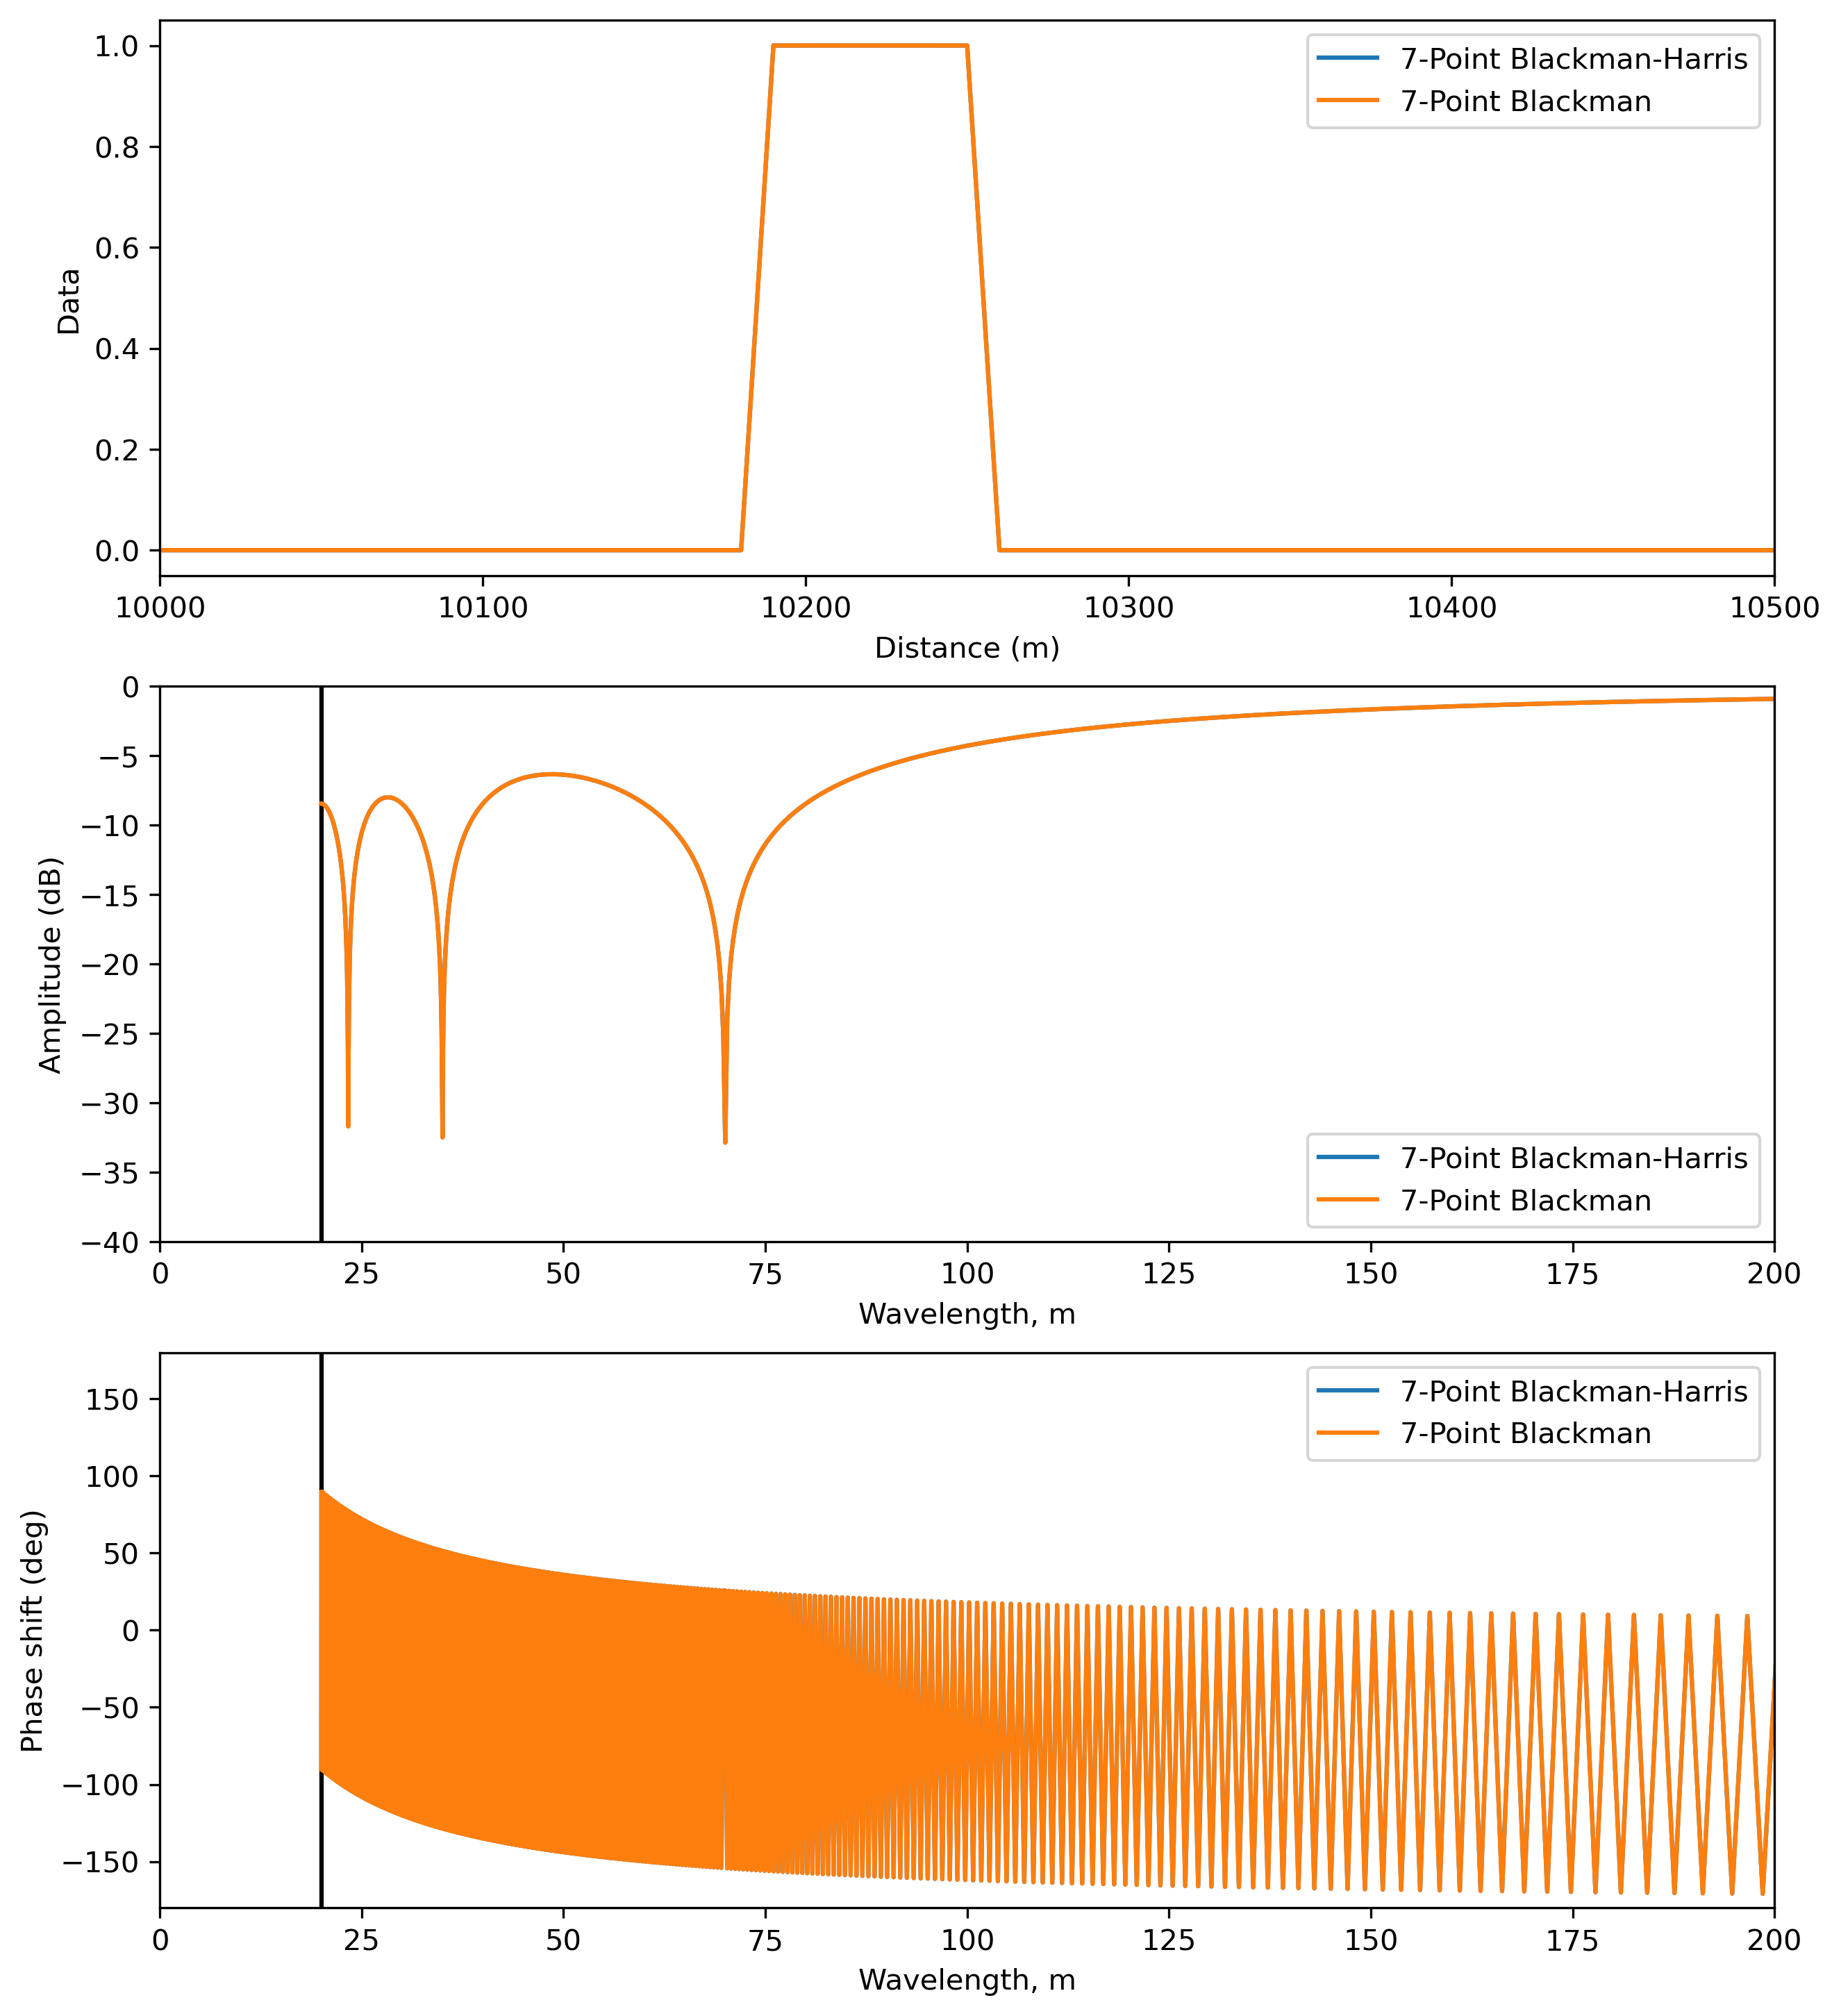

In [34]:
from scipy.signal.windows import blackmanharris, blackman

blackman_harris = blackmanharris(N)

center4 = int((len(blackman_harris))/2)
b_harris_7 = np.array(blackman_harris)
b_harris_7[0:center4-3] = 0
b_harris_7[center4+4:] = 0

blackman_func = blackman(N)
center5 = int((len(blackman_func))/2)
blackman_7 = np.array(blackman_func)
blackman_7[0:center5-3] = 0
blackman_7[center5+4:] = 0

fig, axes = plt.subplots(3, 1, figsize=(10,12), dpi=300)

signals = [b_harris_7, blackman_7]
labels = ['7-Point Blackman-Harris', '7-Point Blackman']

response_plot(signals[:], x, axes, freqs, labels=labels[:], wavelength=True)
axes[0].set_xlim(10000, 10500)
axes[1].set_xlim(0,200)
axes[2].set_xlim(0,200)

**8.** 

**a.** Plot all weight functions together on the same graph, excluding those that show the effect of an artificial cutoff. Use  `dB_amp=False` to show the amplitude response in linear units.  **[Completed]**

**b.** Assume our critiera for a best analysis ranks our priorties as follows:
1. Smooth frequency response
2. Minimum amplitude at the Nyquist
3. Maximum amplitude at relatively small wavelengths just next to the Nyquist

Which weight functions are worst by these critera?

Which weight function do you regard as best, and why?

**Answer: The worst weight function is the Gaussian weight function where K* is equal to 0.1. This is because the amplitude at the nyquist is relatively high. The 3-Point Boxcar one of the worst weight functions as well because it has a higher amplitude at the nyquist than next to the nyquist**

**The best is the Gaussian weight function where K* is equal to 0.5 since it has a smooth frequency response, a minumum amplitude at the nyquist and a maximum amplitude next to the nyquist.** 

**c.** Compare the Nyquist-crossing amplitudes of the two Gaussian weight functions to the values in Koch et al. (1983), Fig. 1. How does each crossing point differ? What is the reason for the differences?

**Answer: K* = 0.1 intersects the Nyquist (lambda* = 1) between 0.3 and 0.4 (closer to 0.4) and K* = 0.5 intersects the Nyquist close to 0 (around 0.02). Looking at my plot, K* = 0.1 intersects the Nyquist near 0.7 and K* = 0.5 intersects the Nyquist close to 0, similar to the Koch paper. The K* = 0.1 different because the use of a different N value or the use of a different delta value**

<span class="ecb">For c., the difference is that we used a discrete FT, and this undersamples the shape of the curve and brings the amplitude close to 1 since it's closer to a delta function in space. -2</span>

<ipython-input-11-5faeb2e3e10a>:25: RuntimeWarning: divide by zero encountered in true_divide
  freqs = 1.0/freq


-20450.0 20450.0


(0.0, 200.0)

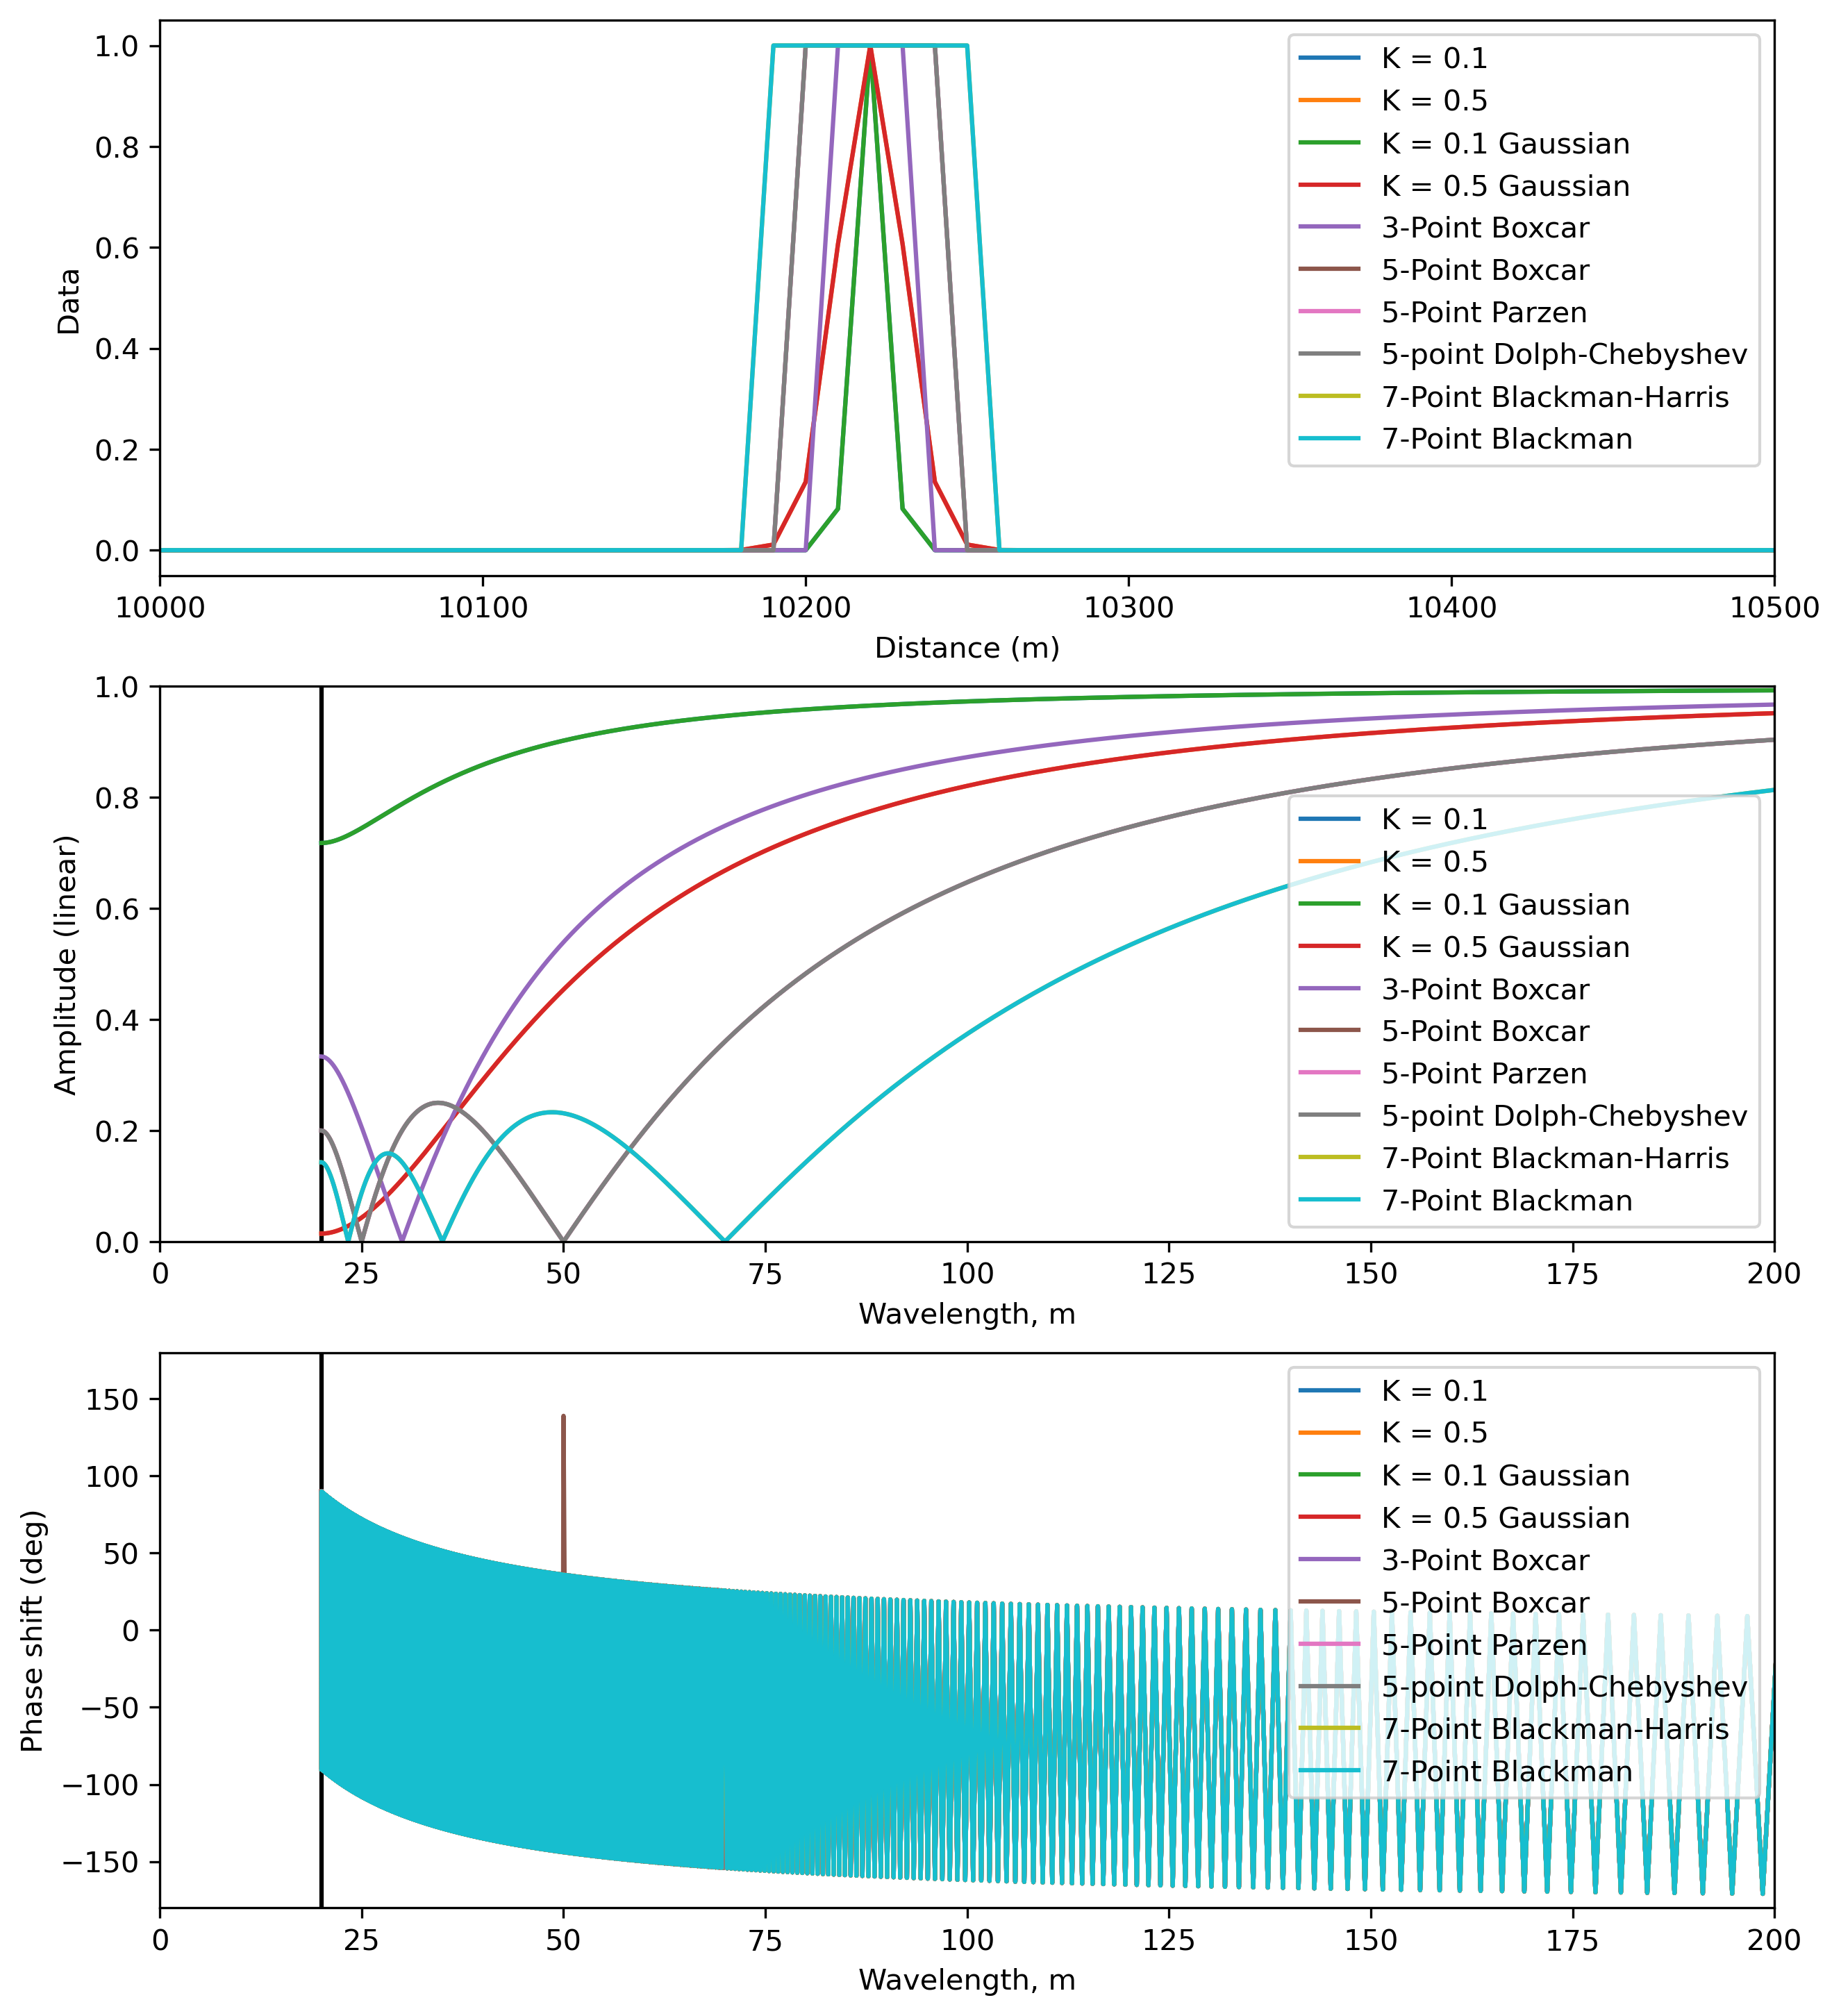

In [36]:
#Part A

fig, axes = plt.subplots(3, 1, figsize=(10,12), dpi=300)

signals = [w_1, w_2, gauss1, gauss2, boxcar_3, boxcar_5, parzen_5, chebwin_5, b_harris_7, blackman_7]
labels = ['K = 0.1', 'K = 0.5','K = 0.1 Gaussian', 'K = 0.5 Gaussian','3-Point Boxcar','5-Point Boxcar',
          '5-Point Parzen','5-point Dolph-Chebyshev', '7-Point Blackman-Harris', '7-Point Blackman']

response_plot(signals[:], x, axes, freqs, labels=labels[:], wavelength=True, dB_amp=False)
axes[0].set_xlim(10000, 10500)
axes[1].set_xlim(0,200)
axes[2].set_xlim(0,200)